In [1]:
import matplotlib.pyplot as plt # used to create plots
from matplotlib.pyplot import figure # used to control size of plots
import numpy as np # for creation of arrays
import pandas as pd # for making data frames
import math # for plotting CMC using log10 scale

from sklearn import datasets, linear_model # linear regression model package
from sklearn.metrics import mean_squared_error, r2_score # statistics to score model 
from sklearn.model_selection import train_test_split # allows model to be tested on unseen data

In [2]:
def linear_regression(x_data, y_data, split, show_data):
          
    '''
    
    linear_regression:
    ------------------
    
    A function that takes in a list of x-data and y-data and uses sklearn package to find the linear relationship
    between the two variables.
    
    Args:
    -----
    
    x_data: list of values for the x-axis
    y_data: list of values for the y-axis
    split: how much training data to use (e.g. 0.8 = 80% for training)
    show_data: boolean to say if information about regression should be printed (training data, test data, gradient
    y_intercept, mean square error, root mean square error and coefficient of determination)
    
    Returns:
    --------
    
    x_test: list of test data from the x-axis
    y_test_meas: list of test data from the y-axis
    y_test_pred: list of predicted y-values using the x-test data
    grad: gradient of predicted line
    intercept: y-intercept of predicted line
    was_test: list of booleans to say if data was used to test the model (True) or to train it (False)
    
    '''
    
    indices = np.arange(len(x_data)) # list of integer values making up the indices of the data
    
    # splits the x- and y-test data randomly according to the specified ratio
    x_train, x_test, y_train, y_test, train_ind, test_ind = train_test_split(x_data, y_data, indices, 
                                                                             train_size = split, random_state = 32)
     
    was_test = [] # returns boolean for each index to say if it was used as test data
    for ind in indices:
        if ind in train_ind:
            was_test.append(False)
        if ind in test_ind:
            was_test.append(True)

    x_train_format = np.array(x_train) # reformat the lengths as numpy arrays as required to reshape later
    x_test_format = np.array(x_test)

    if not isinstance(x_data[0], int): # rounds any data that is not an integer to print later 
        x_data_round = [round(elem, 2) for elem in x_data]
        x_train_round = [round(train, 2) for train in x_train]
        x_test_round = [round(test, 2) for test in x_test]
    else:
        x_data_round = x_data
        x_train_round = x_train
        x_test_round = x_test

    regr = linear_model.LinearRegression() # create linear regression object
    regr.fit(x_train_format.reshape(-1,1), y_train) # train the model using the training sets    
    pred = regr.predict(x_test_format.reshape(-1,1)) # make predictions using the testing set
        
    grad = regr.coef_[0] # gradient of the predicted linear relationship 
    intercept = regr.intercept_ # y-intercept of the predicted linear relationship
    
    pred = ln_cmc_to_cmc(pred) # converts predicted and measured values from ln(CMC) to CMC
    y_test = ln_cmc_to_cmc(y_test)
    
    mse = mean_squared_error(y_test, pred) # mean squared error of results
    rmse = np.sqrt(mean_squared_error(y_test, pred)) # root mean squared error 
    co_det = r2_score(y_test, pred) # coefficient of determination 
    mae = sum(abs(y_test-pred)) / len(y_test) # mean absolute error 
    
    if show_data:  # prints data if asked for 
        print("All: ", x_data_round)
        print("Train: ", x_train_round)
        print("Test: ", x_test_round, "\n")
    
        print("Gradient: ", grad)
        print("Intercept: ", intercept)
        print("Mean squared error: %.2f" % mse)
        print("Root mean squared error: %.2f" % rmse)
        print("Coefficient of determination: %.2f" % co_det)
        print("Mean absolute error: %.2f" % mae)
        print("\n")
    
    return(x_test, y_test, pred, grad, intercept, was_test)

In [3]:
def linear_reg_stats_average(x_data, y_data, split):
              
    '''
    
    linear_reg_stats_average:
    --------------------------
    
    A function that takes in a list of x-data and y-data and finds the average values of the statistics coefficient
    of determination, root mean square error and mean absolute error using sklearn to find the linear relationship.
    
    Args:
    -----
    
    x_data: list of values for the x-axis
    y-data: list of values for the y-axis
    split: test/train split
    
    Returns:
    --------
    
    rmse_av: average value of the root mean square error
    co_det_av: average value of the coefficient of determination
    mae_av: average value of the mean absolute error
    rmse_av_err, co_det_av_err, mae_av_err: standard deviation of the average value
    
    '''
    
    indices = np.arange(len(x_data)) # list of integer values making up the indices of the data
    
    rmse_list = []; co_det_list = []; mae_list = []
    rmse_total = 0; co_det_total = 0; mae_total = 0
    count = 0
    
    for rs in range(100):
        
        # splits the x- and y-test data randomly according to the specified ratio
        x_train, x_test, y_train, y_test, ind_train, ind_test = train_test_split(x_data, y_data, indices, 
                                                                                 train_size = split, 
                                                                                 random_state = rs)

        x_train_format = np.array(x_train) # reformat the lengths as numpy arrays as required to reshape later
        x_test_format = np.array(x_test)

        regr = linear_model.LinearRegression() # create linear regression object

        regr.fit(x_train_format.reshape(-1,1), y_train) # train the model using the training sets
                                           
        pred = regr.predict(x_test_format.reshape(-1,1)) # make predictions using the testing set
        
        y_test_cmc = ln_cmc_to_cmc(y_test) # converts predicted and measured values from ln(CMC) to CMC
        pred_cmc = ln_cmc_to_cmc(pred)
        
        mse = mean_squared_error(y_test_cmc, pred_cmc) # mean squared error of results
        rmse = np.sqrt(mean_squared_error(y_test_cmc, pred_cmc)) # root mean squared error 
        co_det = r2_score(y_test_cmc, pred_cmc) # coefficient of determination  
        mae = sum(abs(y_test_cmc-pred_cmc)) / len(y_test_cmc) # mean absolute error 
        
        if co_det < 0.0: # assumes no correlation if below zero
            co_det = 0.0
            
        rmse_list.append(rmse); co_det_list.append(co_det); mae_list.append(mae)
            
        rmse_total += rmse # adds up the statistics values
        co_det_total += co_det
        mae_total += mae
        count += 1
      
    # finds the standard error of the statistics
    rmse_av_err = np.std(rmse_list, ddof=1) / np.sqrt(len(rmse_list))
    co_det_av_err = np.std(co_det_list, ddof=1) / np.sqrt(len(co_det_list))
    mae_av_err = np.std(mae_list, ddof=1) / np.sqrt(len(mae_list))
        
    rmse_av = rmse_total / count # finds the average by dividing by the number of loops
    co_det_av = co_det_total / count
    mae_av = mae_total / count
    
    print("RMSE: ", round(rmse_av, 2))
    print("Coefficient of Determination: ", round(co_det_av, 2))
    print("MAE: ", round(mae_av, 2))
    
    return(rmse_av, co_det_av, mae_av, rmse_av_err, co_det_av_err, mae_av_err)

In [4]:
def ln_cmc_to_cmc(ln_cmc):
              
    '''
    
    ln_cmc_to_cmc:
    --------------
    
    A function that takes in the predicted ln(CMC) values and converts them to CMC values
    
    Args:
    -----
    
    ln_cmc: list of predicted ln_cmc values
    
    Returns:
    --------
    
    acc_cmc: numpy array of CMC values
    
    '''
          
    cmc_list = []
    
    for val in ln_cmc:
        cmc = np.exp(val) # converts to CMC using the exponential 
        cmc_list.append(cmc)
        
    arr_cmc = np.array(cmc_list)
        
    return(arr_cmc)

In [5]:
def predict_cmc(gradient, intercept, data):
              
    '''
    
    predict_cmc:
    ------------
    
    A function that takes in the gradient and y-intercept of its linear relationship and uses required data to 
    predict the cmc output according to the straight line equation (y = mx + c)
    
    Args:
    -----
    
    gradient: gradient from linear regression
    y-intercept: y-intercept from linear regression
    data: x-value to put into equation 
    
    Returns:
    --------
    
    cmc: predicted CMC value
    
    '''
    
    ln_cmc = (gradient*data) + intercept  # this returns ln(CMC) as this was the straight line relationship
    cmc = np.exp(ln_cmc) # converts ln(CMC) to CMC using exponential 
    
    return(cmc)

In [6]:
def select_data(func_group, carbon_len, cmc_vals, mol_weight, val_elec, logp, chi0, bertzct, 
                chi1, peoe_vsa6, labute_asa, molmr, weiner_index, zagrab_index1, zagrab_index2,
                walk_count, total_lic, endfunc_pos, startfunc_pos, selector):
                  
    '''
    
    select_data:
    ------------
    
    A function that takes in lists of all data required and splits the data based on the different head groups
    
    Args:
    -----
    
    func_group: list of functional groups
    carbon_len, cmc_vals, mol_weight, val_elec, logp, chi0, bertzct, chi1, peoe_vsa6, labute_asa, molmr, 
    weiner_index, zagrab_index1, zagrab_index2, walk_count, total_lic: descriptors being investigated
    endfunc_pos: list to show index where each new head group data ends
    startfunc_pos: list to show index where each new head group data starts
    selector: tells function which data to select
    
    Returns:
    --------
    
    select_{data}: returns same lists but with only selected data 
    
    '''
     
    select_func_group = []; select_carbon_len = []; select_cmc = []; select_ln_cmc = []
    select_MW = []; select_val_elec = []; select_logp = []; select_chi0 = []; select_bertzct = []
    select_chi1 = []; select_peoe_vsa6 = []; select_labute_asa = []; select_molmr = []
    select_wiener_index = []; select_zagreb_index1 = []; select_zagreb_index2 = []; select_walk_count = []
    select_total_ic = []
    
    for num in selector:  # uses the select list to find only the required data and adds to select list
        for FG in func_group[startfunc_pos[num]:endfunc_pos[num]]:
            select_func_group.append(FG)
        for CL in carbon_len[startfunc_pos[num]:endfunc_pos[num]]:
            select_carbon_len.append(CL)
        for CMC in cmc_vals[startfunc_pos[num]:endfunc_pos[num]]:
            select_cmc.append(CMC)
            select_ln_cmc.append(np.log(CMC))
        for MW in mol_weight[startfunc_pos[num]:endfunc_pos[num]]:
            select_MW.append(MW)
        for VE in val_elec[startfunc_pos[num]:endfunc_pos[num]]:
            select_val_elec.append(VE)
        for LP in logp[startfunc_pos[num]:endfunc_pos[num]]:
            select_logp.append(LP)
        for C0 in chi0[startfunc_pos[num]:endfunc_pos[num]]:
            select_chi0.append(C0)
        for BC in bertzct[startfunc_pos[num]:endfunc_pos[num]]:
            select_bertzct.append(BC)
        for C1 in chi1[startfunc_pos[num]:endfunc_pos[num]]:
            select_chi1.append(C1)
        for PV6 in peoe_vsa6[startfunc_pos[num]:endfunc_pos[num]]:
            select_peoe_vsa6.append(PV6)
        for LA in labute_asa[startfunc_pos[num]:endfunc_pos[num]]:
            select_labute_asa.append(LA)
        for MM in molmr[startfunc_pos[num]:endfunc_pos[num]]:
            select_molmr.append(MM)
        for WI in wiener_index[startfunc_pos[num]:endfunc_pos[num]]:
            select_wiener_index.append(WI)
        for ZI1 in zagreb_index1[startfunc_pos[num]:endfunc_pos[num]]:
            select_zagreb_index1.append(ZI1)
        for ZI2 in zagreb_index2[startfunc_pos[num]:endfunc_pos[num]]:
            select_zagreb_index2.append(ZI2)
        for WC in walk_count[startfunc_pos[num]:endfunc_pos[num]]:
            select_walk_count.append(WC)
        for TI in total_ic[startfunc_pos[num]:endfunc_pos[num]]:
            select_total_ic.append(TI)
        
    return(select_func_group, select_carbon_len, select_cmc, select_ln_cmc, select_MW, 
           select_val_elec, select_logp, select_chi0, select_bertzct, select_chi1, select_peoe_vsa6,
           select_labute_asa, select_molmr, select_wiener_index, select_zagreb_index1, select_zagreb_index2,
           select_walk_count, select_total_ic)

In [7]:
def grad_intercept_plotter(head_group, y_intercept, gradient, colours, file_name, save_fig):
                      
    '''
    
    grad_intercept_plotter:
    -----------------------
    
    A function that plots the gradient against the y-intercept to investigate how similar the head groups are
    
    Args:
    -----
    
    head_group: identifies type of molecule
    y_intecept: list of y-intercept values for each molecule
    gradient: list of gradient values for each molecule
    colours: dictionary of head groups and their corresponding colours
    file_name: name to save figure as 
    save_fig: boolean to say if figure should be saved
    
    Returns:
    --------
    
    plot showing the gradient against y-intercept, colour coded to show the head group
    
    '''
     
    for ind, group in enumerate(head_group): # for each head group, plots a colour-coded point 
        plt.scatter(y_intercept[ind], gradient[ind], label = group, color = colours[group])

    plt.ylabel("Gradient")
    plt.xlabel("y-intercept")
    legend = plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0)
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [8]:
def pred_true_cmc_data(cmc_vals_select, test_vals_select, gradient, y_intercept, startfunc_pos, endfunc_pos, 
                       head_group):
                      
    '''
    
    pred_true_cmc_data:
    -------------------
    
    A function that takes in the gradient and y-intercept found from the linear relationship between the chosen
    descriptor and the CMC value and uses it to predict the CMC values for all data using linear regression. 
    It also finds the difference between the true CMC value and the predicted CMC value.
    
    Args:
    -----
    
    cmc_vals_select: CMC values for the data being tested
    test_vals_select: descriptor values for the data being tested
    gradient: list of gradient values for each molecule
    y_intecept: list of y-intercept values for each molecule
    startfunc_pos: list to show were each new head group data starts
    endfunc_pos: list to show were each new head group data ends
    head_group: identifies type of molecule
    
    Returns:
    --------
    
    sep_cmc_pred: lists of the predicted CMC value separated into different lists based on the head group
    sep_cmc_diff: lists of difference between measured and predicted CMC value, separated by head group
    
    '''
         
    cmc_vals_select_all = []
    for ls in cmc_vals_select: # loops through list of lists of cmcs separated based on head group 
        for idv in ls:
            cmc_vals_select_all.append(idv) # puts data into only one list
            
    pred_cmc_test = []
    for ind, test_list in enumerate(test_vals_select): # loops through list of lists (based on head group)
        curr_grad = gradient[ind] # finds associated gradient and y-intercept
        curr_inter = y_intercept[ind]
        for test in test_list: # loops through inidividual data for each head group    
            cmc_pred_val = predict_cmc(curr_grad, curr_inter, test) # uses function to find predicted CMC value
            pred_cmc_test.append(cmc_pred_val)       
            
    pred_cmc_diff = []
    for ind, pred_val in enumerate(pred_cmc_test): # loops through predicted values
        diff = abs(cmc_vals_select_all[ind] - pred_val) # finds difference between predicted and measured CMC value
        pred_cmc_diff.append(diff)
    
    # puts back into a list of lists based on head group
    sep_cmc_pred = []; sep_cmc_diff = []
    for num in range(len(head_group)): # loops through each head group
        indiv_pred = []; indiv_diff = []                 
        for pred in pred_cmc_test[startfunc_pos[num]:endfunc_pos[num]]: # separates prediction based on head group
            indiv_pred.append(pred) # reassigns the predicted value back to the head group associated with it
        for diff in pred_cmc_diff[startfunc_pos[num]:endfunc_pos[num]]:
            indiv_diff.append(diff) # does the same for difference between predicted and measured
        sep_cmc_pred.append(indiv_pred) # puts data back into a list of lists based on head group
        sep_cmc_diff.append(indiv_diff)
    
    return(sep_cmc_pred, sep_cmc_diff)

In [9]:
def pred_meas_cmc_plotter(cmc_pred, cmc_measured, meas_max, pred_max, was_test, plot_as_log, colours, head_group, 
                          file_name, save_fig):
                                  
    '''
    
    pred_meas_cmc_plotter:
    ----------------------
    
    A function that plots the measured CMC value and the predicted CMC value calculated using one of the linear 
    relationships between ln(CMC) and a descriptor, colour coded based on the head group
    
    Args:
    -----
    
    cmc_pred: predicted CMC value
    cmc_measured: measured CMC value
    meas_max: maximum measured value to plot
    pred_max: maximum predicted value to plot
    was_test: list of booleans to say if point was used in the test set
    plot_as_log: boolean to say if log10 scale should be used in plot
    colours: dictionary of head groups and their corresponding colours
    head_group: identifies type of molecule
    file_name: name to save figure as 
    save_fig: boolean to say if figure should be saved
    
    Returns:
    --------
    
    plot showing predicted (using one of the descriptors) and measured CMC value for the individual head group
    
    '''
    
    # labels prevent head group showing up multiple times in legend
    CO2Na_label = 0; NH3Cl_label = 0; NMe3Br_label = 0; OSO3Na_label = 0; SO3Na_label = 0; PyBr_label = 0
    Ethoxylates_label = 0; Carboxylic_Acid_label = 0; NMe2NBzCl_label = 0; NH3Ac_label = 0; SO3H_label = 0

    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    new_meas = []
    new_pred = []
    
    for ind1, pred_list in enumerate(cmc_pred):
        meas_list = cmc_measured[ind1] # finds list based on different head group
        curr_head = head_group[ind1]
        curr_was_test = was_test[ind1]
        for ind2, pred in enumerate(pred_list): # gets individual CMC value
            test = curr_was_test[ind2] # changes marker, fill and size depending on whether the point is test or
            if test:                   # training data
                mark = "v"
                size = 36
                mfc = colours[curr_head]
                mec = colours[curr_head]
            else:
                mark = "o"
                size= 28
                mfc = "None"
                mec = colours[curr_head]
            
            meas = meas_list[ind2]
            
            if plot_as_log:
                meas = math.log10(meas)
                pred = math.log10(pred)
        
            new_meas.append(meas)
            new_pred.append(pred)
            
            if meas < meas_max and pred < pred_max: # only plots values below the specified max
            # checks if the individual head group has already been labelled in the legend and if not, plots the
            # data with the label corresponding to the head group
                if CO2Na_label == 0 and curr_head == "CO2Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_head, marker = mark)
                    CO2Na_label += 1
                elif NH3Cl_label == 0 and curr_head == "NH3Cl":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, 
                                label = curr_head, marker = mark)
                    NH3Cl_label += 1
                elif NMe3Br_label == 0 and curr_head == "NMe3Br":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    NMe3Br_label += 1
                elif OSO3Na_label == 0 and curr_head == "OSO3Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    OSO3Na_label += 1
                elif SO3Na_label == 0 and curr_head == "SO3Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    SO3Na_label += 1
                elif PyBr_label == 0 and curr_head == "PyBr":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    PyBr_label += 1
                elif Ethoxylates_label == 0 and curr_head == "Ethoxylates":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    Ethoxylates_label += 1
                elif Carboxylic_Acid_label == 0 and curr_head == "Carboxylic Acid":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    Carboxylic_Acid_label += 1
                elif NMe2NBzCl_label == 0 and curr_head == "NMe2NBzCl":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    NMe2NBzCl_label += 1
                elif SO3H_label == 0 and curr_head == "SO3H":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    SO3H_label += 1
                elif NH3Ac_label == 0 and curr_head == "NH3Ac":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec,
                                label = curr_head, marker = mark)
                    NH3Ac_label += 1
                else: # if it already has a label, it plots without one to avoid multiples in the legend
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, marker = mark)
     
    highest_num = max(max(new_meas), max(new_pred)) # finds largest value in both lists
    lowest_num = min(min(new_meas), min(new_pred))
    if highest_num > meas_max or highest_num > pred_max: # used to plot ideal line only below desired value
        highest_num = max(meas_max, pred_max)
        
    all_num_list = np.arange(lowest_num, highest_num, 1.0) # plots line where pred equals measured for comparison
    plt.plot(all_num_list, all_num_list, linestyle = "dashed", color = "black", linewidth = 0.5)

    if plot_as_log:
        y_lab = "Predicted log(CMC / mM)"
        x_lab = "Measured log(CMC / mM)"
    else:
        y_lab = "Predicted CMC / mM"
        x_lab = "Measured CMC / mM"
        
    plt.ylabel(y_lab, fontsize = 20)
    plt.xlabel(x_lab, fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "x-large")
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [10]:
def pred_meas_cmc_test_plotter(cmc_pred, cmc_measured, meas_max, pred_max, colours, head_group, file_name, 
                               save_fig):
                                  
    '''
    
    pred_meas_cmc_test_plotter:
    ---------------------------
    
    A function that plots the measured CMC value and the predicted CMC value calculated using one of the linear 
    relationships between ln(CMC) and a descriptor, using just the test group, colour coded based on the head group
    
    Args:
    -----
    
    cmc_pred: predicted CMC value
    cmc_measured: measured CMC value
    meas_max: maximum measured value to plot
    pred_max: maximum predicted value to plot
    colours: dictionary of head groups and their corresponding colours
    head_group: identifies type of molecule
    file_name: name to save figure as 
    save_fig: boolean to say if figure should be saved
    
    Returns:
    --------
    
    plot showing predicted (using one of the descriptors) and measured CMC value for the individual head group
    
    '''
    
    # labels prevent head group showing up multiple times in legend
    CO2Na_label = 0; NH3Cl_label = 0; NMe3Br_label = 0; OSO3Na_label = 0; SO3Na_label = 0; PyBr_label = 0
    Ethoxylates_label = 0; Carboxylic_Acid_label = 0; NMe2NBzCl_label = 0; NH3Ac_label = 0; SO3H_label = 0

    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    for ind1, pred_list in enumerate(cmc_pred):  
        meas_list = cmc_measured[ind1] # finds list based on different head group
        curr_head = head_group[ind1]
        for ind2, pred in enumerate(pred_list): # gets individual CMC value
            meas = meas_list[ind2]
            if meas < meas_max and pred < pred_max: # only plots values below the specified max
            # checks if the individual head group has already been labelled in the legend and if not, plots the
            # data with the label corresponding to the head group
                if CO2Na_label == 0 and curr_head == "CO2Na":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    CO2Na_label += 1
                elif NH3Cl_label == 0 and curr_head == "NH3Cl":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    NH3Cl_label += 1
                elif NMe3Br_label == 0 and curr_head == "NMe3Br":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    NMe3Br_label += 1
                elif OSO3Na_label == 0 and curr_head == "OSO3Na":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    OSO3Na_label += 1
                elif SO3Na_label == 0 and curr_head == "SO3Na":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    SO3Na_label += 1
                elif PyBr_label == 0 and curr_head == "PyBr":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    PyBr_label += 1
                elif Ethoxylates_label == 0 and curr_head == "Ethoxylates":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    Ethoxylates_label += 1
                elif Carboxylic_Acid_label == 0 and curr_head == "Carboxylic Acid":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    Carboxylic_Acid_label += 1
                elif NMe2NBzCl_label == 0 and curr_head == "NMe2NBzCl":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    NMe2NBzCl_label += 1
                elif SO3H_label == 0 and curr_head == "SO3H":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    SO3H_label += 1
                elif NH3Ac_label == 0 and curr_head == "NH3Ac":  
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], label = curr_head, marker = "v")
                    NH3Ac_label += 1
                else: # if it already has a label, it plots without one to avoid multiples in the legend
                    plt.scatter(meas, pred, s = 36, c = colours[curr_head], marker = "v")
    
    all_meas = []; all_pred = []
    for ind1, group in enumerate(cmc_measured): # puts all data in one list to find minimum and maximum
        for ind2, m_cmc in enumerate(group):
            p_cmc = cmc_pred[ind1][ind2]
            all_meas.append(m_cmc)
            all_pred.append(p_cmc)
     
    highest_num = max(max(all_meas), max(all_pred)) # finds largest value in both lists
    if highest_num > meas_max or highest_num > pred_max: # used to plot ideal line only below desired value
        highest_num = max(meas_max, pred_max)
    
    all_num_list = np.arange(0, highest_num, 1.0) # plots line where predicted equals measured for comparison
    plt.plot(all_num_list, all_num_list, linestyle = "dashed", color = "black", linewidth = 0.5)

    plt.ylabel("Predicted CMC / mM", fontsize = 20)
    plt.xlabel("Measured CMC / mM", fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "x-large")
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [11]:
def pred_meas_indiv_plotter(cmc_pred, cmc_measured, colours, head_group, select):
                              
    '''
    
    pred_meas_indiv_plotter:
    ------------------------
    
    A function that plots the predicted CMC value against the measured CMC value and the predicted CMC value 
    calculated using one of the linear relationships between ln(CMC) and a descriptor for one specific head 
    group only
    
    Args:
    -----
    
    cmc_pred: predicted CMC value
    cmc_measured: measured CMC value
    colours: ldictionary of head groups and their corresponding colours
    head_group: identifies type of molecule
    select: index to tell which head group to plot
    
    Returns:
    --------
    
    plot showing predicted (using one of the descriptors) and measured CMC value for the individual head group.
    shows relationship between predicted and measured value
    
    '''
    
    # selects list of data for individual head group
    curr_head = head_group[select]; curr_meas = cmc_measured[select]; curr_pred = cmc_pred[select]
    
    data_point = 0 # used to control number times head group labelled in legend
    
    for ind, meas in enumerate(curr_meas):
        pred = curr_pred[ind]
        if data_point == 0: # used to check if the data has been labelled in the legend yet 
                            # if not, it plots with the label corresponding to the head group
            plt.scatter(meas, pred, s = 16, c = colours[curr_head], label = curr_head)
            data_point += 1
        else: # if it already has a label, it plots without one to avoid multiples in the legend
            plt.scatter(meas, pred, s = 16, c = colours[curr_head])

    highest_num = max(max(curr_meas), max(curr_pred)) # finds largest value in both lists
    all_num_list = np.arange(0, highest_num, 1.0) # plots line where predicted equals measured for comparison
    plt.plot(all_num_list, all_num_list, linestyle = "dashed", color = "black", linewidth = 0.5)

    plt.ylabel("Predicted CMC / mM")
    plt.xlabel("Measured CMC / mM")
    plt.legend()
    
    plt.show()
    
    return

In [12]:
def diff_true_cmc_plotter(cmc_diff, cap, test_vals_select, colours, head_group, x_label, file_name, save_fig):
                          
    '''
    
    diff_true_cmc_plotter:
    ---------------------
    
    A function that plots the difference between the measured CMC value and the predicted CMC value against the 
    descriptor used to calculate the relationship using linear regression and colour codes based on head group
    
    Args:
    -----
    
    cmc_diff: difference in the CMC values between measured and predicted
    cap: sets values above this number as this cap value to limit the y-axis
    test_vals_select: descriptor values for the data being tested
    colours: dictionary of head groups and their corresponding colours
    head_group: identifies type of molecule
    x_label: label for the graph to describe the descriptor
    file_name: name to save figure as 
    save_fig: boolean to say if figure should be saved
    
    Returns:
    --------
    
    plot showing difference between the true CMC value and the predicted CMC value using one of the descriptors
    
    '''
     
    f = plt.figure() # changes size of plot to show results more clearly
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    for ind, diff in enumerate(cmc_diff): # data plotted and colour coded based on head group
        new_diff = []
        for indiv_diff in diff:
            if indiv_diff > cap: # if larger than cap, sets value to cap to prevent too large y-axis
                indiv_diff = cap
            new_diff.append(indiv_diff)
        curr_head = head_group[ind]
        # plots colour coded point
        plt.scatter(test_vals_select[ind], new_diff, s = 10, c = colours[curr_head], label = curr_head)

    plt.ylabel("Difference between predicted and measured CMC / mM")
    plt.xlabel(x_label, fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    legend = plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "large")
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [13]:
def cmc_var_plot(cmc_vals_select, variable_data, variable_name, head_group, colours, file_name, save_fig):
                              
    '''
    
    cmc_var_plot:
    -------------
    
    Function that plots the relationship between the predicted ln(CMC) values from linear regression against the
    variable used in the prediction for each head group to show how the gradient and y-intercept are related
    
    Args:
    -----
    
   cmc_vals_select: list of CMC values
   variable_data: list of descriptor values 
   variable_name: descriptor being used
   head_group: list of head groups
   colours: dictionary of colours relating to head groups
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot showing the predicted relationship between ln(CMC) and the descriptor using linear regression for each 
    head group
    
    '''
    
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    for select in range(len(head_group)):
        curr_head = head_group[select] # finds data for each head group
        curr_cmc_vals = cmc_vals_select[select]
        curr_var_data = variable_data[select]
    
        data_point = 0
        
        curr_ln_cmc_vals = [] # converts predicted CMC values into ln(CMC)
        for cmc in curr_cmc_vals:
            cmc_vals = np.log(cmc)
            curr_ln_cmc_vals.append(cmc_vals)
        
        xx = np.array(curr_var_data)
        yy = np.array(curr_ln_cmc_vals)
        
        regr = linear_model.LinearRegression() # create linear regression object
        regr.fit(xx.reshape(-1,1), yy) # train the model using the training sets
        
        grad = regr.coef_[0] # gradient of the predicted linear relationship 
        intercept = regr.intercept_ # y-intercept of the predicted linear relationship
        
        best_fit = [(grad*xx + intercept) for xx in curr_var_data] # plots predicted line
        plt.plot(curr_var_data, best_fit, c = colours[curr_head], linestyle = "--")
    
        for ind, cmc_vals in enumerate(curr_ln_cmc_vals):
            var = curr_var_data[ind]
            if data_point == 0: # used to check if the data has been labelled in the legend yet 
                                # if not, it plots with the label corresponding to the head group
                plt.scatter(var, cmc_vals, s = 16, c = colours[curr_head], label = curr_head)
                data_point += 1
            else: # if it already has a label, it plots without one to avoid multiples in the legend
                plt.scatter(var, cmc_vals, s = 16, c = colours[curr_head])
                
        print(curr_head, "equation: y = ", grad, "x + ", intercept, "\n")

    plt.ylabel("ln(CMC / mM)", fontsize = 20)
    plt.xlabel(variable_name, fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    legend = plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "large")
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [14]:
def lin_reg_stats_plot(variable_data, variable_all, variable_name, stat_name, head_group, colours, file_name, 
                       save_fig):
                              
    '''
    
    lin_reg_stats_plot:
    --------------------
    
    Function that plots the statistics (RMSE, coefficent of determination and MAE) resulting from linear 
    regression for each head group
    
    Args:
    -----
    
   variable_data: list of statistic values 
   variable_all: list of variable values from linear regression of whole data set to compare
   variable_name: descriptor being used
   stat_name: statistic being used
   head_group: list of head groups
   colours: dictionary of colours relating to head groups
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot showing the values of the statistics from linear regression for each head group
    
    '''
    
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    plt.axvspan(-0.5, 0.5, facecolor = "lightyellow") # changes background colour based on similarity 
    plt.axvspan(0.5, 2.5, facecolor = "lightcyan")
    plt.axvspan(2.5, 12.5, facecolor = "lavender")
    plt.axvspan(12.5, 13.5, facecolor = "blanchedalmond")
    plt.axvspan(13.5, 14.5, facecolor = "mistyrose")
    
    label2 = 0 # prevents multiple labels in legend
    
    for select in range(len(head_group)):
        curr_head = head_group[select]
        curr_var_data = variable_data[select]
    
        label1 = 0 # prevents multiple labels in legend
        
        for ind, des in enumerate(curr_var_data):
            des_all = variable_all[ind] # value resulting from linear regression using all molecules
            name = variable_name[ind]
             
            if label2 == 0: # used to check if the data has been labelled in the legend yet 
                            # if not, it plots label for all data
                plt.scatter(name, des_all, s = 20, c = "black", label = "All Molecules", marker = "v", 
                            alpha = 0.8)
                label2 += 1
            else: # if it already has a label, it plots without one to avoid multiples in the legend
                plt.scatter(name, des_all, s = 20,  c = "black", marker = "v", alpha = 0.8)
            
            if label1 == 0: # used to check if the data has been labelled in the legend yet 
                            # if not, it plots with the label corresponding to the head group
                plt.scatter(name, des, s = 20, c = colours[curr_head], label = curr_head)
                label1 += 1
            else: # if it already has a label, it plots without one to avoid multiples in the legend
                plt.scatter(name, des, s = 20, c = colours[curr_head])
    
    plt.ylabel(stat_name, fontsize = 20)
    plt.xlabel("Descriptor", fontsize = 20)
    plt.xticks(rotation = 45, ha = "right", fontsize = 18)
    plt.yticks(fontsize = 20)
    legend = plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "large")
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [15]:
def export_legend(legend, filename):
                              
    '''
    
    export_legend:
    ---------------
    
    Function that saves legend as separate figure.
    
    Args:
    -----
    
   legend: legend from graph
   filename: name to figure as 
    
    
    Returns:
    --------
    
    Legend saved as a separate figure
    
    '''
        
    expand = [-10, -10, 10, 10]
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi = 500, bbox_inches = bbox)
    
    return

In [16]:
def stats_error_plot(var_data, var_name, var_err, select_var, stat_name, head_group, colours, file_name, save_fig):
                              
    '''
    
    stats_error_plot:
    -----------------
    
    Function that plots the statistics (RMSE, coefficent of determination and MAE) and their error bars 
    resulting from linear regression for each head group
    
    Args:
    -----
    
   var_data: list of statistic values 
   var_name: descriptor being used
   var_error: error for stats value
   select_var: list of index values for which descriptors to plot
   stat_name: statistic being used
   head_group: list of head groups
   colours: dictionary of colours relating to head groups
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot showing the values of the statistics and their errors from linear regression for each head group
    
    '''
    
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    label2 = 0 # prevents multiple labels in legend
    
    for i, curr_head in enumerate(head_group):
        
        label1 = 0 # prevents multiple labels in legend
        curr_var_data = var_data[i]
        curr_err = var_err[i]
        
        for ind, des in enumerate(curr_var_data):
            if ind in select_var: # only plots selected descriptors
                name = var_name[ind]
                des = curr_var_data[ind]
                err_val = curr_err[ind]
            
                if label1 == 0: # used to check if the data has been labelled in the legend yet 
                                # if not, it plots with the label corresponding to the head group
                    plt.errorbar(name, des, yerr = err_val, fmt = "o", c = colours[curr_head], 
                                label = curr_head)
                    label1 += 1
                else: # if it already has a label, it plots without one to avoid multiples in the legend
                    plt.errorbar(name, des, yerr = err_val, fmt = "o", c = colours[curr_head])
                
    plt.ylabel(stat_name, fontsize = 20)
    plt.xlabel("Descriptor", fontsize = 20)
    plt.xticks(rotation = 45, ha = "right", fontsize = 20)
    plt.yticks(fontsize = 20)
    legend = plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "large")
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [17]:
# reads in data about the critical micelle concentration, values are separated by a comma
cmc_data = pd.read_csv(open("Submit_Data/output_descriptors.csv"), 
                       delimiter = (","))  

# puts values of required data into a list 
func_group = list(cmc_data["func_group"]); carbon_len = list(cmc_data["carbon_len"])
cmc_vals = list(cmc_data["CMC"]); mol_weight = list(cmc_data["MW"])
val_elec = list(cmc_data["NVE"]); logp_vals = list(cmc_data["logP"]); chi0 = list(cmc_data["chi0"]) 
bertzct = list(cmc_data["bertzct"]); chi1 = list(cmc_data["chi1"]); peoe_vsa6 = list(cmc_data["peoe_vsa6"])
labute_asa = list(cmc_data["labute_asa"]); molmr = list(cmc_data["molmr"])
wiener_index = list(cmc_data["wiener_index"]); zagreb_index1 = list(cmc_data["zagreb_index1"])
zagreb_index2 = list(cmc_data["zagreb_index2"]); walk_count = list(cmc_data["walk_count"])
total_ic = list(cmc_data["total_ic"])
ln_cmc = [np.log(cmc) for cmc in cmc_vals]

In [18]:
endfunc_pos = []
startfunc_pos = [0]

# finds index where each head group starts and ends in list of lists
for ind, func in enumerate(func_group):  # loops through list of head groups
    if ind < (len(func_group)-1) and func != func_group[ind+1]: # checks if next elem in list has same head group
        startfunc_pos.append(ind+1)
        endfunc_pos.append(ind+1)
    elif ind == (len(func_group)-1): # on the last one, only append to end position list
        endfunc_pos.append(ind+1)

In [19]:
# list of the descriptors used for plotting statistics values
descriptor_list = ["Carbon Length", "logP", "PEOE-VSA6", "MW", "NVE", "TotalIC", "Chi0", "Chi1", "LabuteASA", 
                   "MolMR", "Zagreb Index1", "Zagreb Index2", "Walk Count", "BertzCT", "Wiener Index"]

In [20]:
# dictionary of colours for plotting each head group
colours = {"CO2Na" : "steelblue", "NH3Cl" : "orange", "NMe3Br" : "green", "OSO3Na" : "red", 
           "SO3Na" : "mediumorchid", "PyBr" : "navy", "Ethoxylates" : "pink", "Carboxylic Acid" : "gray",
          "NMe2NBzCl" : "darkseagreen", "SO3H" : "peru", "NH3Ac" : "magenta"}

***Separating head groups and performing separate linear regression***

In [21]:
head_group = []
cLen_gradient = []; cLen_y_intercept = []; logP_gradient = []; logP_y_intercept = []
MW_gradient = []; MW_y_intercept = []; NVE_gradient = []; NVE_y_intercept = []
chi0_gradient = []; chi0_y_intercept = []; bertzct_gradient = []; bertzct_y_intercept = []
chi1_gradient = []; chi1_y_intercept = []; peoe_vsa6_gradient = []; peoe_vsa6_y_intercept = []
labute_asa_gradient = []; labute_asa_y_intercept = []; molmr_gradient = []; molmr_y_intercept = []
wiener_index_gradient = []; wiener_index_y_intercept = []; zagreb_index1_gradient = []; zagreb_index1_y_intercept = [];
zagreb_index2_gradient = []; zagreb_index2_y_intercept = []; walk_count_gradient = []; walk_count_y_intercept = []
total_ic_gradient = []; total_ic_y_intercept = []

cLen_test_pred_list = []; cLen_test_meas_list = []; cLen_test_ind_list = []
logP_test_pred_list = []; logP_test_meas_list = []; logP_test_ind_list = []
MW_test_pred_list = []; MW_test_meas_list = []; MW_test_ind_list = []
NVE_test_pred_list = []; NVE_test_meas_list = []; NVE_test_ind_list = []

RMSE = []; co_det = []; MAE = []; RMSE_err = []; co_det_err = []; MAE_err = []

cmc_vals_select = []; logp_vals_select = []; carbon_len_select = []; MW_select = []; NVE_select = []
chi0_select = []; bertzct_select = []; chi1_select = []; peoe_vsa6_select = []; labute_asa_select = []
molmr_select = []; wiener_index_select = []; zagreb_index1_select = []; zagreb_index2_select = []
walk_count_select = []; total_ic_select = []

show_data = False

for group in range(len(colours)):
    selector = [group] # selects each different head group separately
    # uses function to separate all the data at each individual head group
    FG, CL, CMC, LnCMC, MW, VE, LP, C0, BC, C1, PV6, LA, MM, WI, ZI1, ZI2, WC, TI = select_data(func_group, carbon_len, cmc_vals, mol_weight, val_elec, logp_vals, 
                                                                                                chi0, bertzct, chi1, peoe_vsa6, labute_asa, molmr, wiener_index, zagreb_index1, 
                                                                                                zagreb_index2, walk_count, total_ic, endfunc_pos, startfunc_pos, selector)
    
    # creates list of a list of descriptors with each head group being in a separate list
    cmc_vals_select.append(CMC); carbon_len_select.append(CL); logp_vals_select.append(LP)
    MW_select.append(MW); NVE_select.append(VE); chi0_select.append(C0); bertzct_select.append(BC)
    chi1_select.append(C1); peoe_vsa6_select.append(PV6); labute_asa_select.append(LA); molmr_select.append(MM)
    wiener_index_select.append(WI); zagreb_index1_select.append(ZI1); zagreb_index2_select.append(ZI2)
    walk_count_select.append(WC); total_ic_select.append(TI)
    
    rmse_des = []; co_det_des = []; mae_des = []; rmse_err_des = []; co_det_err_des = []; mae_err_des = []
    
    print("\n Head Group: ", FG[0])
    head_group.append(FG[0]) 
    
    # performs linear regression for each head group separately for each descriptor
    # saves the measured and predicted value of the test set for each descriptor in a list
    # saves the gradient and y-intercept values for the linear relationship in a list
    # finds the average statistics value and their standard error for each relationship
    # saves statistics value in a list
    print("Carbon chain length") 
    cLen_x_test, cLen_test_meas, cLen_test_pred, cLen_grad, cLen_intercept, cLen_test_ind = linear_regression(CL, LnCMC, 0.7, show_data)
    cLen_test_pred_list.append(cLen_test_pred); cLen_test_meas_list.append(cLen_test_meas); cLen_test_ind_list.append(cLen_test_ind)
    cLen_gradient.append(cLen_grad); cLen_y_intercept.append(cLen_intercept)
    
    rmse_av_CL, co_det_av_CL, mae_av_CL, rmse_av_err_CL, co_det_av_err_CL, mae_av_err_CL = linear_reg_stats_average(CL, LnCMC, 0.7)
    rmse_des.append(rmse_av_CL); co_det_des.append(co_det_av_CL); mae_des.append(mae_av_CL)
    rmse_err_des.append(rmse_av_err_CL); co_det_err_des.append(co_det_av_err_CL); mae_err_des.append(mae_av_err_CL)
    
    print("logP") 
    logP_x_test, logP_test_meas, logP_test_pred, logP_grad, logP_intercept, logP_test_ind = linear_regression(LP, LnCMC, 0.7, show_data)
    logP_test_pred_list.append(logP_test_pred); logP_test_meas_list.append(logP_test_meas); logP_test_ind_list.append(logP_test_ind)
    logP_gradient.append(logP_grad); logP_y_intercept.append(logP_intercept)
    
    rmse_av_LP, co_det_av_LP, mae_av_LP, rmse_av_err_LP, co_det_av_err_LP, mae_av_err_LP = linear_reg_stats_average(LP, LnCMC, 0.7)
    rmse_des.append(rmse_av_LP); co_det_des.append(co_det_av_LP); mae_des.append(mae_av_LP)
    rmse_err_des.append(rmse_av_err_LP); co_det_err_des.append(co_det_av_err_LP); mae_err_des.append(mae_av_err_LP)
    
    print("peoe_vsa6")
    peoe_vsa6_x_test, peoe_vsa6_test_meas, peoe_vsa6_test_pred, peoe_vsa6_grad, peoe_vsa6_intercept, peoe_vsa6_test_ind = linear_regression(PV6, LnCMC, 0.7, show_data)
    peoe_vsa6_gradient.append(peoe_vsa6_grad); peoe_vsa6_y_intercept.append(peoe_vsa6_intercept)
    
    rmse_av_PV6, co_det_av_PV6, mae_av_PV6, rmse_av_err_PV6, co_det_av_err_PV6, mae_av_err_PV6 = linear_reg_stats_average(PV6, LnCMC, 0.7)
    rmse_des.append(rmse_av_PV6); co_det_des.append(co_det_av_PV6); mae_des.append(mae_av_PV6)
    rmse_err_des.append(rmse_av_err_PV6); co_det_err_des.append(co_det_av_err_PV6); mae_err_des.append(mae_av_err_PV6)
    
    print("MW") 
    MW_x_test, MW_test_meas, MW_test_pred, MW_grad, MW_intercept, MW_test_ind = linear_regression(MW, LnCMC, 0.7, show_data)
    MW_test_pred_list.append(MW_test_pred); MW_test_meas_list.append(MW_test_meas); MW_test_ind_list.append(MW_test_ind)
    MW_gradient.append(MW_grad); MW_y_intercept.append(MW_intercept)
    
    rmse_av_MW, co_det_av_MW, mae_av_MW, rmse_av_err_MW, co_det_av_err_MW, mae_av_err_MW = linear_reg_stats_average(MW, LnCMC, 0.7)
    rmse_des.append(rmse_av_MW); co_det_des.append(co_det_av_MW); mae_des.append(mae_av_MW)
    rmse_err_des.append(rmse_av_err_MW); co_det_err_des.append(co_det_av_err_MW); mae_err_des.append(mae_av_err_MW)
    
    print("NVE") 
    NVE_x_test, NVE_test_meas, NVE_test_pred, NVE_grad, NVE_intercept, NVE_test_ind = linear_regression(VE, LnCMC, 0.7, show_data)
    NVE_test_pred_list.append(NVE_test_pred); NVE_test_meas_list.append(NVE_test_meas); NVE_test_ind_list.append(NVE_test_ind)
    NVE_gradient.append(NVE_grad); NVE_y_intercept.append(NVE_intercept)
    
    rmse_av_NVE, co_det_av_NVE, mae_av_NVE, rmse_av_err_NVE, co_det_av_err_NVE, mae_av_err_NVE = linear_reg_stats_average(VE, LnCMC, 0.7)
    rmse_des.append(rmse_av_NVE); co_det_des.append(co_det_av_NVE); mae_des.append(mae_av_NVE)
    rmse_err_des.append(rmse_av_err_NVE); co_det_err_des.append(co_det_av_err_NVE); mae_err_des.append(mae_av_err_NVE)
    
    print("total_ic")
    total_ic_x_test, total_ic_test_meas, total_ic_test_pred, total_ic_grad, total_ic_intercept, total_ic_test_ind = linear_regression(TI, LnCMC, 0.7, show_data)
    total_ic_gradient.append(total_ic_grad); total_ic_y_intercept.append(total_ic_intercept)
    
    rmse_av_TI, co_det_av_TI, mae_av_TI, rmse_av_err_TI, co_det_av_err_TI, mae_av_err_TI = linear_reg_stats_average(TI, LnCMC, 0.7)
    rmse_des.append(rmse_av_TI); co_det_des.append(co_det_av_TI); mae_des.append(mae_av_TI)
    rmse_err_des.append(rmse_av_err_TI); co_det_err_des.append(co_det_av_err_TI); mae_err_des.append(mae_av_err_TI)
    
    print("chi0")
    chi0_x_test, chi0_test_meas, chi0_test_pred, chi0_grad, chi0_intercept, chi0_test_ind = linear_regression(C0, LnCMC, 0.7, show_data)
    chi0_gradient.append(chi0_grad); chi0_y_intercept.append(chi0_intercept)
    
    rmse_av_C0, co_det_av_C0, mae_av_C0, rmse_av_err_C0, co_det_av_err_C0, mae_av_err_C0 = linear_reg_stats_average(C0, LnCMC, 0.7)
    rmse_des.append(rmse_av_C0); co_det_des.append(co_det_av_C0); mae_des.append(mae_av_C0)
    rmse_err_des.append(rmse_av_err_C0); co_det_err_des.append(co_det_av_err_C0); mae_err_des.append(mae_av_err_C0)
    
    print("chi1")
    chi1_x_test, chi1_test_meas, chi1_test_pred, chi1_grad, chi1_intercept, chi1_test_ind = linear_regression(C1, LnCMC, 0.7, show_data)
    chi1_gradient.append(chi1_grad); chi1_y_intercept.append(chi1_intercept)
    
    rmse_av_C1, co_det_av_C1, mae_av_C1, rmse_av_err_C1, co_det_av_err_C1, mae_av_err_C1 = linear_reg_stats_average(C1, LnCMC, 0.7)
    rmse_des.append(rmse_av_C1); co_det_des.append(co_det_av_C1); mae_des.append(mae_av_C1)
    rmse_err_des.append(rmse_av_err_C1); co_det_err_des.append(co_det_av_err_C1); mae_err_des.append(mae_av_err_C1)
    
    print("labute_asa")
    labute_asa_x_test, labute_asa_test_meas, labute_asa_test_pred, labute_asa_grad, labute_asa_intercept, labute_asa_test_ind = linear_regression(LA, LnCMC, 0.7, show_data)
    labute_asa_gradient.append(labute_asa_grad); labute_asa_y_intercept.append(labute_asa_intercept)
    
    rmse_av_LA, co_det_av_LA, mae_av_LA, rmse_av_err_LA, co_det_av_err_LA, mae_av_err_LA = linear_reg_stats_average(LA, LnCMC, 0.7)
    rmse_des.append(rmse_av_LA); co_det_des.append(co_det_av_LA); mae_des.append(mae_av_LA)
    rmse_err_des.append(rmse_av_err_LA); co_det_err_des.append(co_det_av_err_LA); mae_err_des.append(mae_av_err_LA)
    
    print("molmr")
    molmr_x_test, molmr_test_meas, molmr_test_pred, molmr_grad, molmr_intercept, molmr_test_ind = linear_regression(MM, LnCMC, 0.7, show_data)
    molmr_gradient.append(molmr_grad); molmr_y_intercept.append(molmr_intercept)
    
    rmse_av_MM, co_det_av_MM, mae_av_MM, rmse_av_err_MM, co_det_av_err_MM, mae_av_err_MM = linear_reg_stats_average(MM, LnCMC, 0.7)
    rmse_des.append(rmse_av_MM); co_det_des.append(co_det_av_MM); mae_des.append(mae_av_MM)
    rmse_err_des.append(rmse_av_err_MM); co_det_err_des.append(co_det_av_err_MM); mae_err_des.append(mae_av_err_MM)
    
    print("zagreb_index1")
    zagreb_index1_x_test, zagreb_index1_test_meas, cLen_test_pred, zagreb_index1_grad, zagreb_index1_intercept, zagreb_index1_test_ind = linear_regression(ZI1, LnCMC, 0.7, show_data)
    zagreb_index1_gradient.append(zagreb_index1_grad); zagreb_index1_y_intercept.append(zagreb_index1_intercept)
    
    rmse_av_ZI1, co_det_av_ZI1, mae_av_ZI1, rmse_av_err_ZI1, co_det_av_err_ZI1, mae_av_err_ZI1 = linear_reg_stats_average(ZI1, LnCMC, 0.7)
    rmse_des.append(rmse_av_ZI1); co_det_des.append(co_det_av_ZI1); mae_des.append(mae_av_ZI1)
    rmse_err_des.append(rmse_av_err_ZI1); co_det_err_des.append(co_det_av_err_ZI1); mae_err_des.append(mae_av_err_ZI1)
    
    print("zagreb_index2")
    zagreb_index2_x_test, zagreb_index2_test_meas, zagreb_index2_test_pred, zagreb_index2_grad, zagreb_index2_intercept, zagreb_index2_test_ind = linear_regression(ZI2, LnCMC, 0.7, show_data)
    zagreb_index2_gradient.append(zagreb_index2_grad); zagreb_index2_y_intercept.append(zagreb_index2_intercept)
    
    rmse_av_ZI2, co_det_av_ZI2, mae_av_ZI2, rmse_av_err_ZI2, co_det_av_err_ZI2, mae_av_err_ZI2 = linear_reg_stats_average(ZI2, LnCMC, 0.7)
    rmse_des.append(rmse_av_ZI2); co_det_des.append(co_det_av_ZI2); mae_des.append(mae_av_ZI2)
    rmse_err_des.append(rmse_av_err_ZI2); co_det_err_des.append(co_det_av_err_ZI2); mae_err_des.append(mae_av_err_ZI2)
    
    print("walk_count")
    walk_count_x_test, walk_count_test_meas, walk_count_test_pred, walk_count_grad, walk_count_intercept, walk_count_test_ind = linear_regression(WC, LnCMC, 0.7, show_data)
    rmse_av_WC, co_det_av_WC, mae_av_WC, rmse_av_err_WC, co_det_av_err_WC, mae_av_err_WC = linear_reg_stats_average(WC, LnCMC, 0.7)
    rmse_des.append(rmse_av_WC); co_det_des.append(co_det_av_WC); mae_des.append(mae_av_WC)
    rmse_err_des.append(rmse_av_err_WC); co_det_err_des.append(co_det_av_err_WC); mae_err_des.append(mae_av_err_WC)
    walk_count_gradient.append(walk_count_grad); walk_count_y_intercept.append(walk_count_intercept)
    
    print("bertzCT")
    bertzct_x_test, bertzct_test_meas, bertzct_test_pred, bertzct_grad, bertzct_intercept, bertzct_test_ind = linear_regression(BC, LnCMC, 0.7, show_data)
    bertzct_gradient.append(bertzct_grad); bertzct_y_intercept.append(bertzct_intercept)
    
    rmse_av_BC, co_det_av_BC, mae_av_BC, rmse_av_err_BC, co_det_av_err_BC, mae_av_err_BC = linear_reg_stats_average(BC, LnCMC, 0.7)
    rmse_des.append(rmse_av_BC); co_det_des.append(co_det_av_BC); mae_des.append(mae_av_BC)
    rmse_err_des.append(rmse_av_err_BC); co_det_err_des.append(co_det_av_err_BC); mae_err_des.append(mae_av_err_BC)
    
    print("wiener_index")
    wiener_index_x_test, wiener_index_test_meas, wiener_index_test_pred, wiener_index_grad, wiener_index_intercept, wiener_index_test_ind = linear_regression(WI, LnCMC, 0.7, show_data)
    wiener_index_gradient.append(wiener_index_grad); wiener_index_y_intercept.append(wiener_index_intercept)
    
    rmse_av_WI, co_det_av_WI, mae_av_WI, rmse_av_err_WI, co_det_av_err_WI, mae_av_err_WI = linear_reg_stats_average(WI, LnCMC, 0.7)
    rmse_des.append(rmse_av_WI); co_det_des.append(co_det_av_WI); mae_des.append(mae_av_WI)
    rmse_err_des.append(rmse_av_err_WI); co_det_err_des.append(co_det_av_err_WI); mae_err_des.append(mae_av_err_WI)
    
    RMSE.append(rmse_des); co_det.append(co_det_des); MAE.append(mae_des)
    RMSE_err.append(rmse_err_des); co_det_err.append(co_det_err_des); MAE_err.append(mae_err_des)


 Head Group:  CO2Na
Carbon chain length
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
logP
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
peoe_vsa6
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
MW
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
NVE
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
total_ic
RMSE:  5.51
Coefficient of Determination:  0.99
MAE:  3.9
chi0
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
chi1
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
labute_asa
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
molmr
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
zagreb_index1
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
zagreb_index2
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
walk_count
RMSE:  7.86
Coefficient of Determination:  0.98
MAE:  5.57
bertzCT
RMSE:  14.32
Coefficient of Determination:  0.96
MAE:  9.94
wiener_index
RMSE:  52.65
Co

RMSE:  3.44
Coefficient of Determination:  0.99
MAE:  2.78
bertzCT
RMSE:  8.44
Coefficient of Determination:  0.99
MAE:  6.08
wiener_index
RMSE:  53.04
Coefficient of Determination:  0.41
MAE:  39.92

 Head Group:  NMe2NBzCl
Carbon chain length
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
logP
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
peoe_vsa6
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
MW
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
NVE
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
total_ic
RMSE:  12.63
Coefficient of Determination:  0.52
MAE:  9.18
chi0
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
chi1
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
labute_asa
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
molmr
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
zagreb_index1
RMSE:  11.38
Coefficient of Determination:  0.54
MAE:  8.29
zagreb_index2
RMSE:  11

***Statistics plots***

In [22]:
# stats values from linear regression for all data to compare
RMSE_all = [68.19, 58.01, 64.53, 66.41, 66.43, 66.44, 66.47, 66.49, 66.06, 64.51, 66.48, 66.61, 66.46, 68.99, 
            70.23]
co_det_all = [0.0, 0.21, 0.07, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.06, 0.03, 0.02, 0.03, 0.0, 0.0]
mae_all = [27.12, 22.67, 25.73, 25.52, 25.49, 25.54, 25.52, 25.55, 25.32, 24.58, 25.62, 25.71, 25.56, 26.99, 27.58]

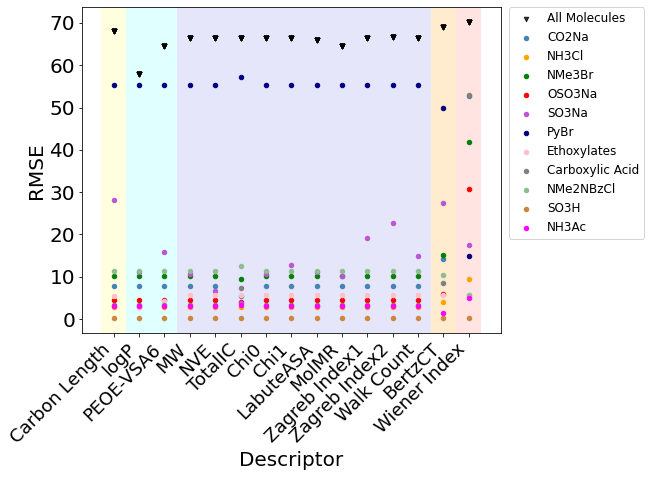

In [23]:
lin_reg_stats_plot(RMSE, RMSE_all, descriptor_list, "RMSE", head_group, colours, "RMSE_lin_reg.png", False)

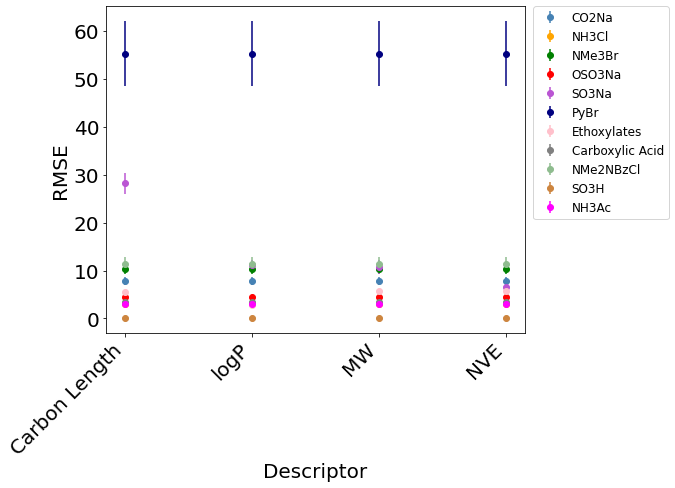

In [24]:
stats_error_plot(RMSE, descriptor_list, RMSE_err, [0, 1, 3, 4], "RMSE", head_group, colours, 
                 "RMSE_err_lin_reg.png", False)

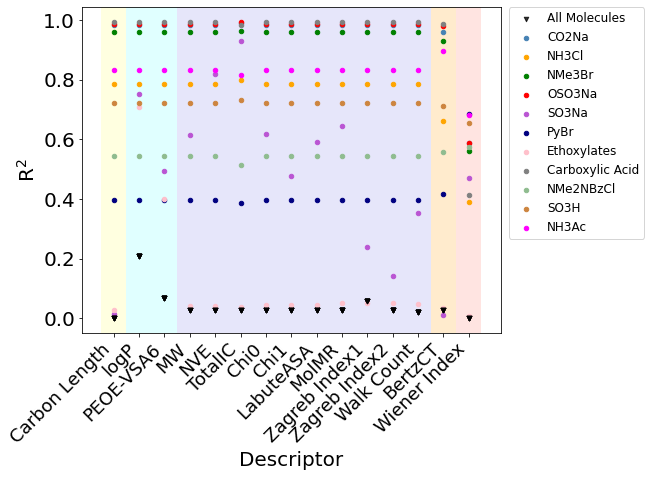

In [25]:
lin_reg_stats_plot(co_det, co_det_all, descriptor_list, "R$^2$", head_group, colours, "co_det_lin_reg.png", False)

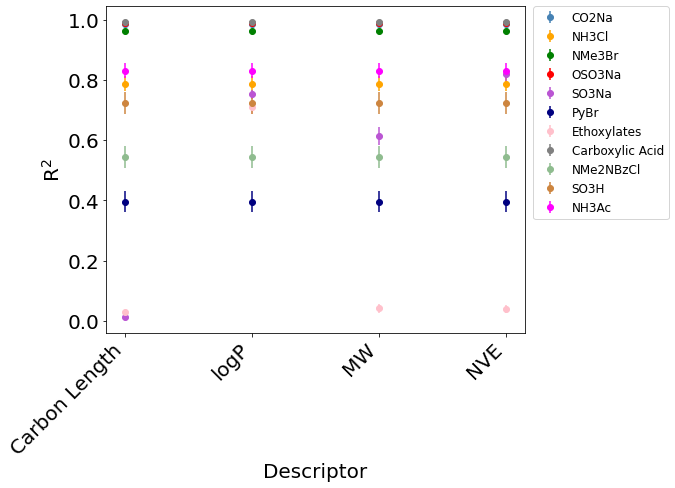

In [26]:
stats_error_plot(co_det, descriptor_list, co_det_err, [0, 1, 3, 4], "R$^2$", head_group, colours, 
                 "co_det_err_lin_reg.png", False)

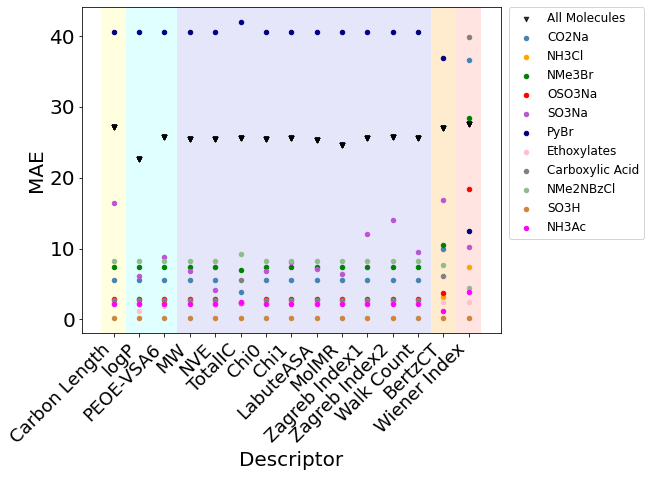

In [27]:
lin_reg_stats_plot(MAE, mae_all, descriptor_list, "MAE", head_group, colours, "MAE_lin_reg.png", False)

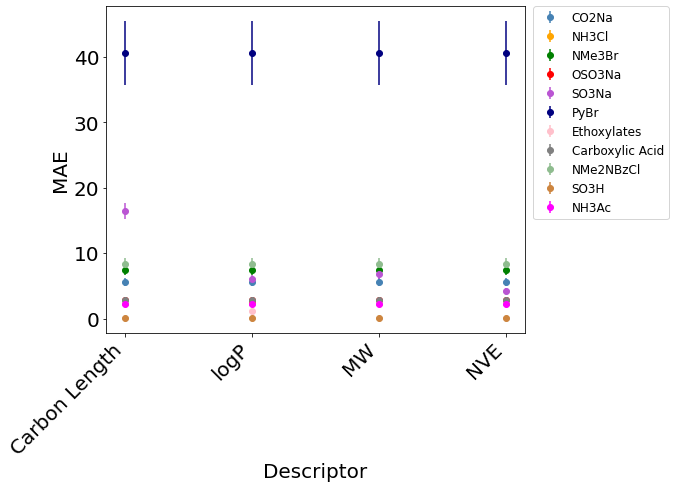

In [28]:
stats_error_plot(MAE, descriptor_list, MAE_err, [0, 1, 3, 4], "MAE", head_group, colours, "MAE_err_lin_reg.png", 
                 False)

***Length of Carbon Chain***

CO2Na equation: y =  -0.6649334849157638 x +  10.584725950206286 

NH3Cl equation: y =  -0.6671547064674348 x +  10.623259245786999 

NMe3Br equation: y =  -0.6952477215141644 x +  11.124137129462381 

OSO3Na equation: y =  -0.6550604948508886 x +  10.022405835430346 

SO3Na equation: y =  -0.4826572992482672 x +  7.008403731633489 

PyBr equation: y =  -0.7554905057774304 x +  11.67838924041717 

Ethoxylates equation: y =  -0.6978601282265893 x +  5.677680185797714 

Carboxylic Acid equation: y =  -0.6567490007855067 x +  11.1505627867712 

NMe2NBzCl equation: y =  -0.7914139588034858 x +  10.655957214185278 

SO3H equation: y =  -0.7393846015211706 x +  10.542788117689518 

NH3Ac equation: y =  -0.6286898712827748 x +  10.044259561369891 



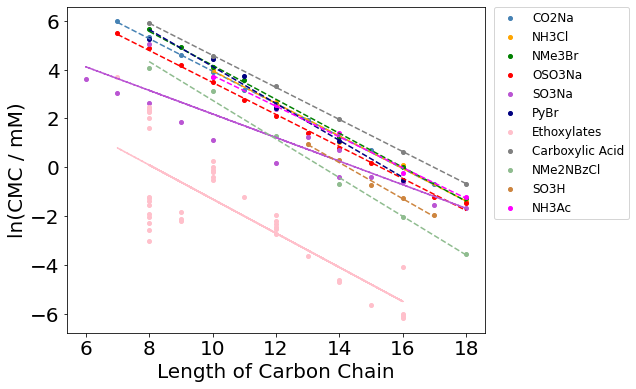

In [29]:
cmc_var_plot(cmc_vals_select, carbon_len_select, "Length of Carbon Chain", head_group, colours, 
             "compare_cLen.png", False)

*Plot of gradient vs y-intercept for training based on carbon chain length*

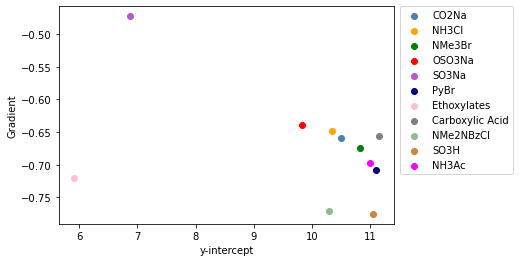

In [30]:
grad_intercept_plotter(head_group, cLen_y_intercept, cLen_gradient, colours, "cLen_grad_inter.png", False)

*Predicted against measured plot*

This section plots the predicted CMC values from the linear regression model against the measured ones, as well as showing the line which is the point where the predicted is equal to the measured (the ideal case where prediction is correct).

*Only plots test values* 

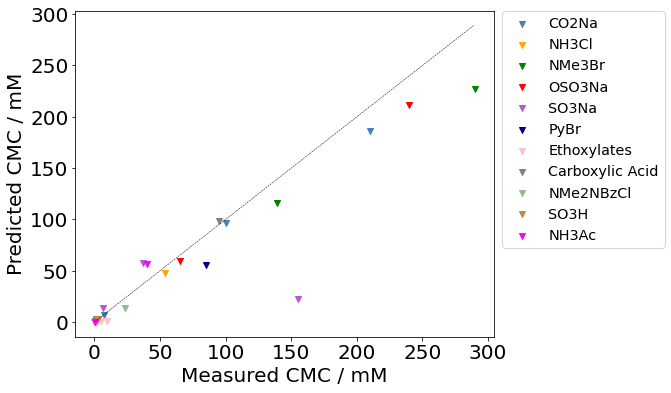

In [31]:
pred_meas_cmc_test_plotter(cLen_test_pred_list, cLen_test_meas_list, 600, 600, colours, head_group, 
                           "cLen_test_pred_meas.png", False)

*Plots all values*

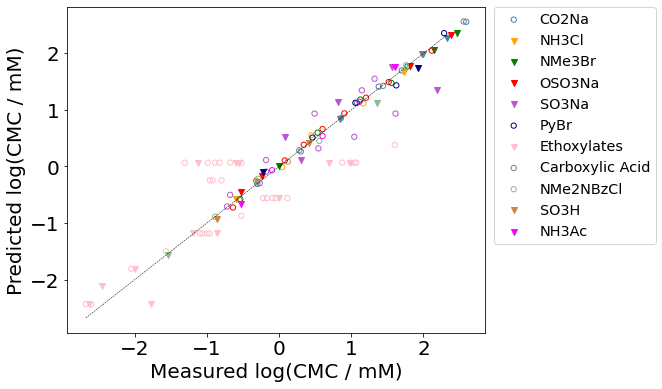

In [32]:
cLen_pred, cLen_pred_diff = pred_true_cmc_data(cmc_vals_select, carbon_len_select, cLen_gradient, cLen_y_intercept,
                                               startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(cLen_pred, cmc_vals_select, 600, 600, cLen_test_ind_list, True, colours, head_group, 
                      "cLen_pred_meas_log.png", False)

*Individual head group plot*

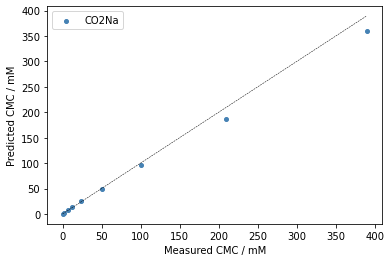

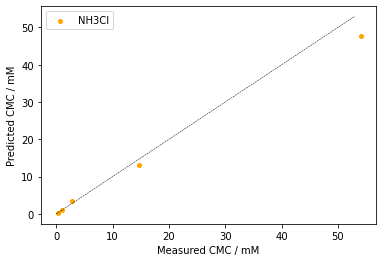

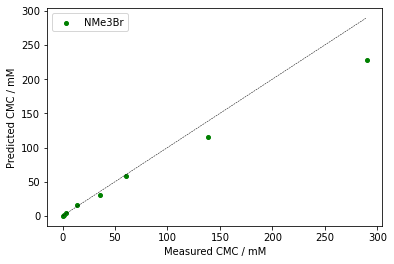

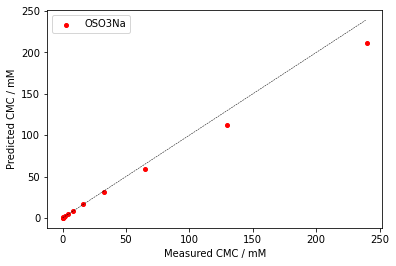

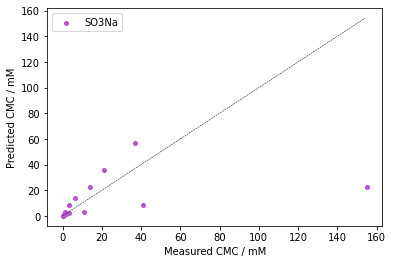

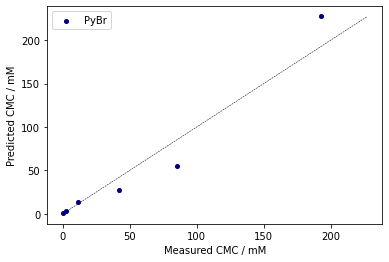

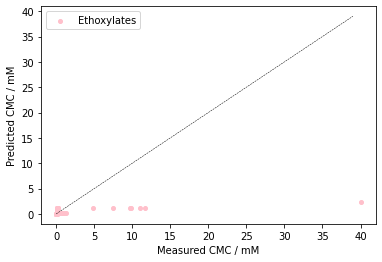

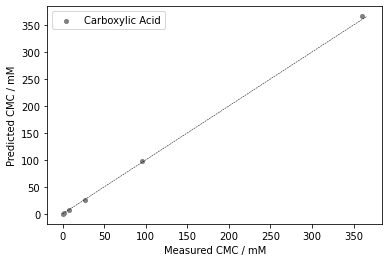

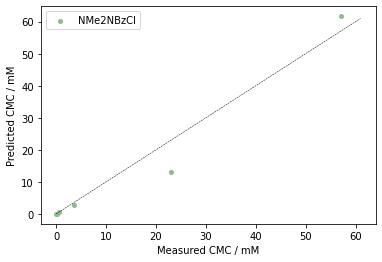

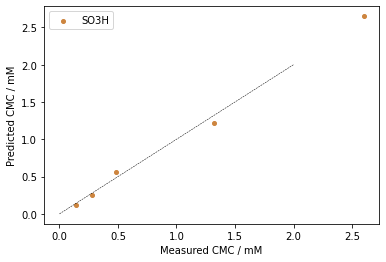

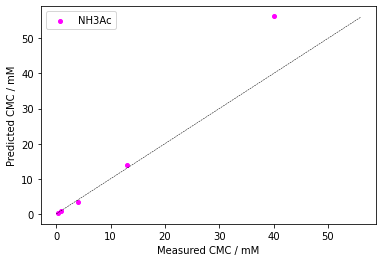

In [33]:
for i in range(len(head_group)):
    pred_meas_indiv_plotter(cLen_pred, cmc_vals_select, colours, head_group, i)

*Difference between predicted and measured*

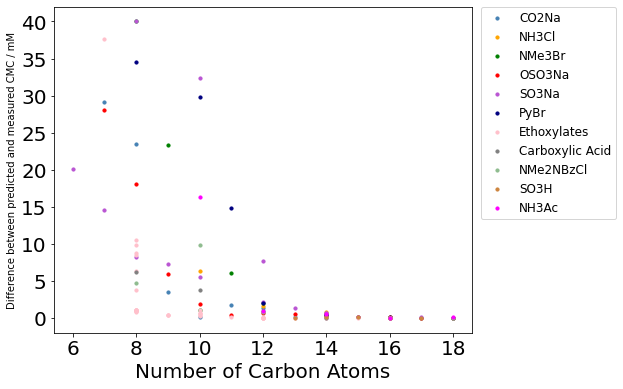

In [34]:
diff_true_cmc_plotter(cLen_pred_diff, 40, carbon_len_select, colours, head_group, "Number of Carbon Atoms",
                     "cLen_diff_pred_meas.png", False)

***logP***

CO2Na equation: y =  -1.7045205970668107 x +  7.799709746658815 

NH3Cl equation: y =  -1.7102145769480486 x +  8.003210513902577 

NMe3Br equation: y =  -1.782229483502084 x +  11.003480193429281 

OSO3Na equation: y =  -1.6792117273798715 x +  7.844300303845911 

SO3Na equation: y =  -1.6570546111215736 x +  7.793275031533111 

PyBr equation: y =  -1.9366585639001008 x +  12.226269948144504 

Ethoxylates equation: y =  -2.4624985478434955 x +  7.959943869172077 

Carboxylic Acid equation: y =  -1.6835401199320839 x +  8.399826584814162 

NMe2NBzCl equation: y =  -2.0287463696577426 x +  13.518315467135395 

SO3H equation: y =  -1.8953719598081762 x +  8.213944590673204 

NH3Ac equation: y =  -1.6116120771155436 x +  7.575269859228863 



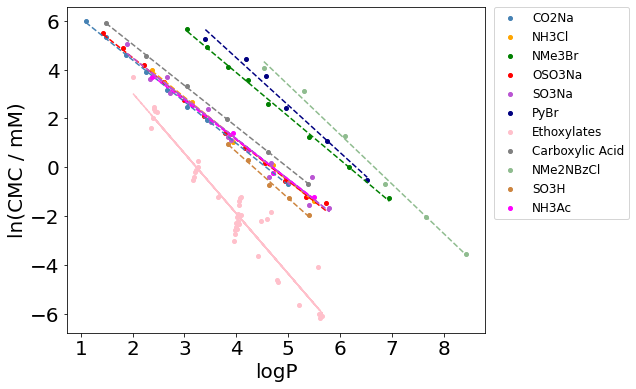

In [35]:
cmc_var_plot(cmc_vals_select, logp_vals_select, "logP", head_group, colours, "compare_logP.png", False)

*Plot of gradient vs y-intercept for training based on logP value*

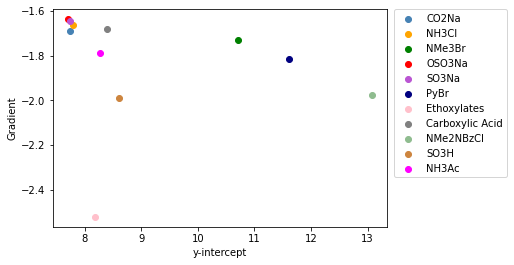

In [36]:
grad_intercept_plotter(head_group, logP_y_intercept, logP_gradient, colours, "logP_grad_inter.png", False)

*Plot of predicted CMC values for different logP values*

*Only plots test values*

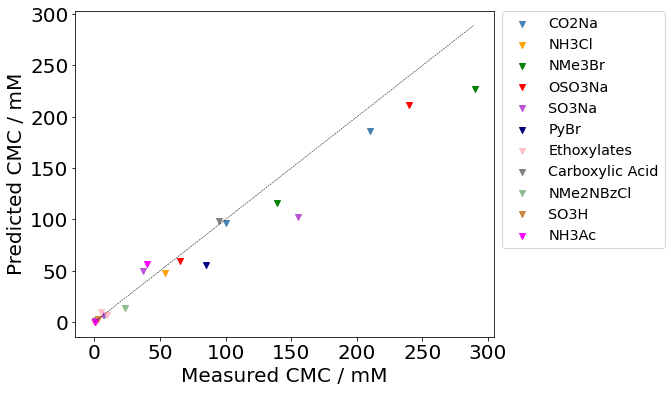

In [37]:
pred_meas_cmc_test_plotter(logP_test_pred_list, logP_test_meas_list, 600, 600, colours, head_group, 
                           "logP_test_pred_meas.png", False)

*Plots all values*

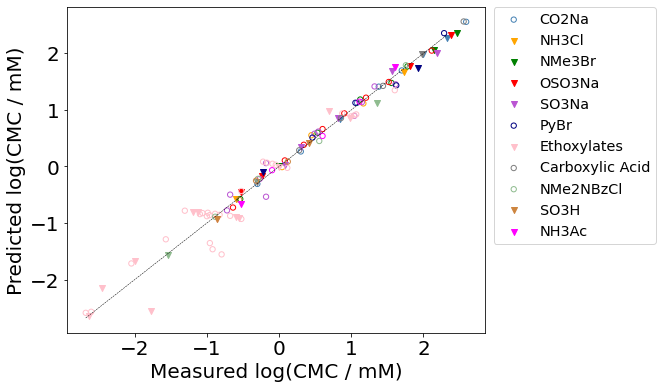

In [38]:
logP_pred, logP_pred_diff = pred_true_cmc_data(cmc_vals_select, logp_vals_select, logP_gradient, logP_y_intercept,
                                               startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(logP_pred, cmc_vals_select, 600, 600, logP_test_ind_list, True, colours, head_group, 
                      "logP_pred_meas_log.png", False)

*Individual head group plot* 

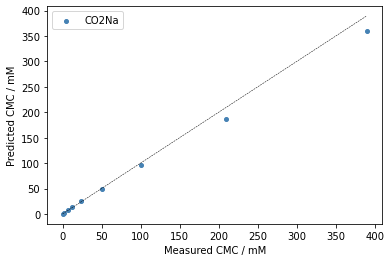

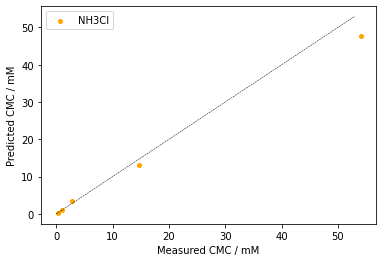

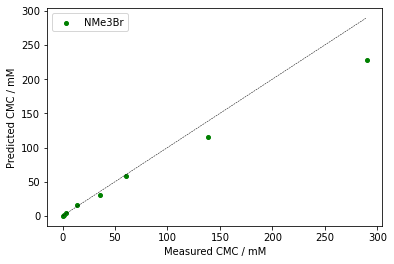

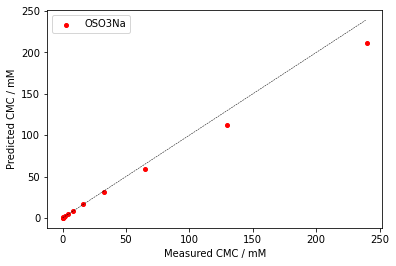

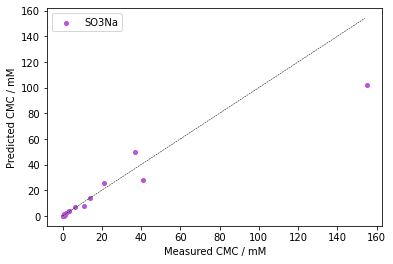

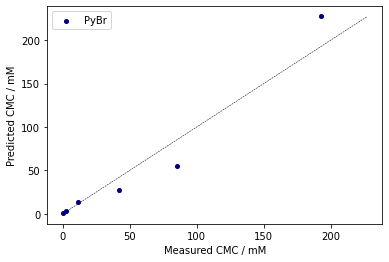

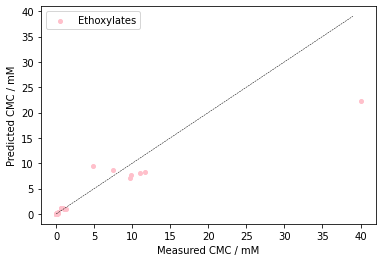

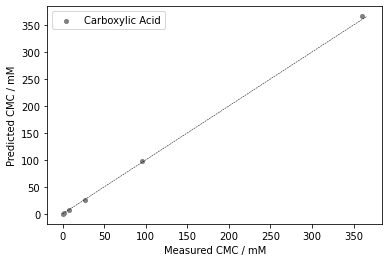

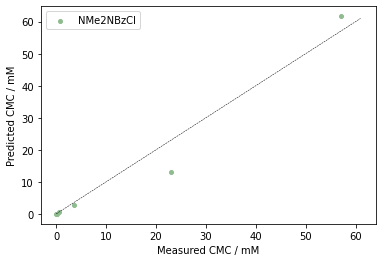

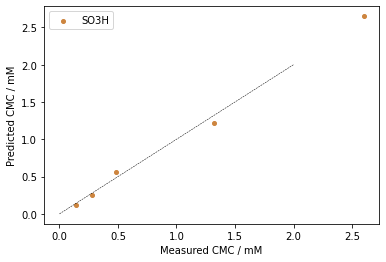

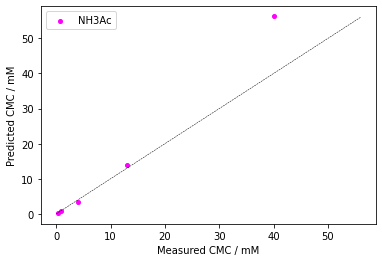

In [39]:
for i in range(len(head_group)):
    pred_meas_indiv_plotter(logP_pred, cmc_vals_select, colours, head_group, i)

*Difference between predicted and measured*

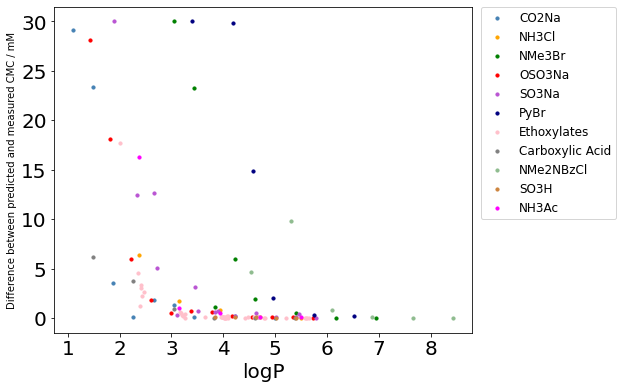

In [40]:
diff_true_cmc_plotter(logP_pred_diff, 30, logp_vals_select, colours, head_group, "logP", "logP_diff_pred_meas.png",
                     False)

***Molecular Weight***

CO2Na equation: y =  -0.047442215086668245 x +  12.719540368420127 

NH3Cl equation: y =  -0.0476006966085048 x +  11.481681904392335 

NMe3Br equation: y =  -0.049605099894720395 x +  14.104450011801838 

OSO3Na equation: y =  -0.04673778896160154 x +  14.55410667143517 

SO3Na equation: y =  -0.04245199267051806 x +  13.184604291624801 

PyBr equation: y =  -0.05390335106310561 x +  15.993324226753172 

Ethoxylates equation: y =  -0.006482653591937277 x +  1.5836171485558341 

Carboxylic Acid equation: y =  -0.0468582618563233 x +  13.25910035906995 

NMe2NBzCl equation: y =  -0.05646644680693607 x +  20.881870031710324 

SO3H equation: y =  -0.052754213906946935 x +  14.814042989352933 

NH3Ac equation: y =  -0.04485627626346069 x +  10.853189822242069 



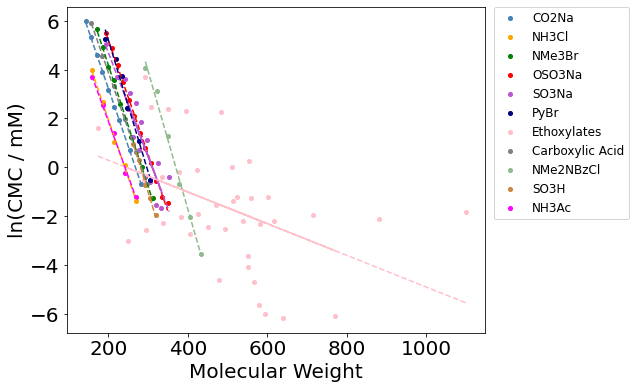

In [41]:
cmc_var_plot(cmc_vals_select, MW_select, "Molecular Weight", head_group, colours, "compare_MW.png", False)

*Plot of gradient vs y-intercept for training based on MW value*

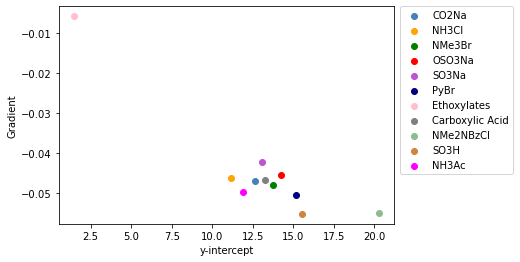

In [42]:
grad_intercept_plotter(head_group, MW_y_intercept, MW_gradient, colours, "MW_grad_inter.png", False)

*Plot of predicted CMC values for different MW values*

*Only plots test values*

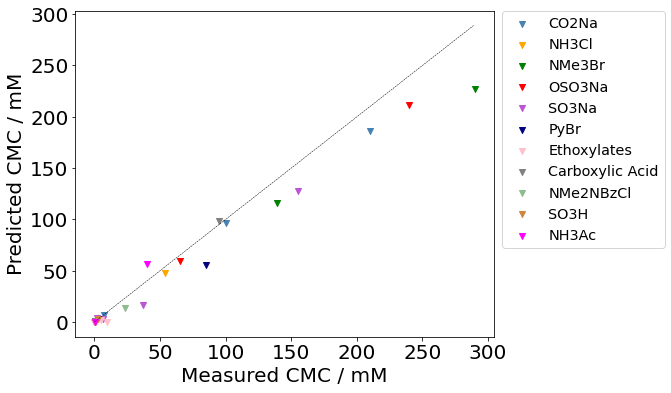

In [43]:
pred_meas_cmc_test_plotter(MW_test_pred_list, MW_test_meas_list, 600, 600, colours, head_group, 
                           "MW_test_pred_meas.png", False)

*Plots all values*

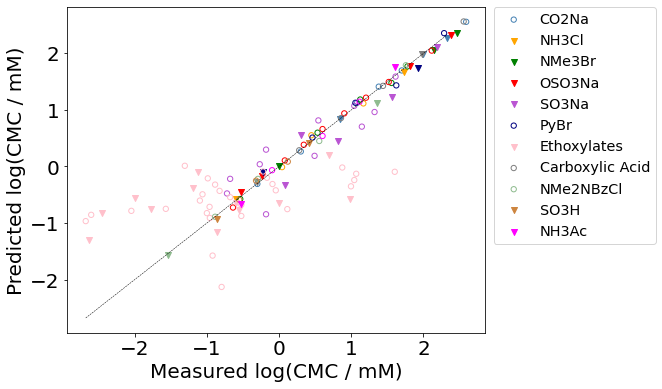

In [44]:
MW_pred, MW_pred_diff = pred_true_cmc_data(cmc_vals_select, MW_select, MW_gradient, MW_y_intercept,
                                               startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(MW_pred, cmc_vals_select, 600, 600, MW_test_ind_list, True, colours, head_group, 
                      "MW_pred_meas_log.png", False)

*Individual head group plot*

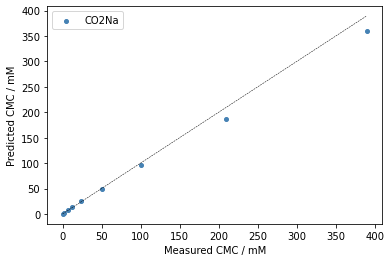

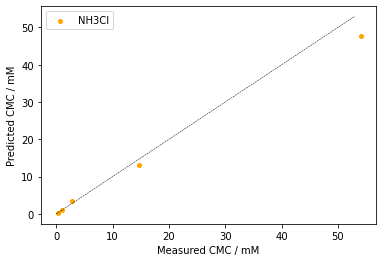

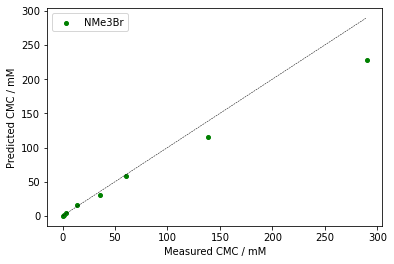

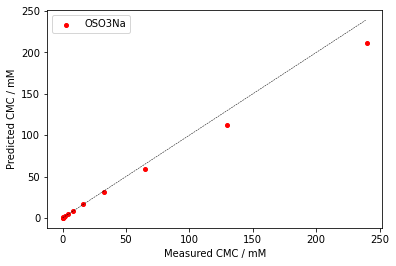

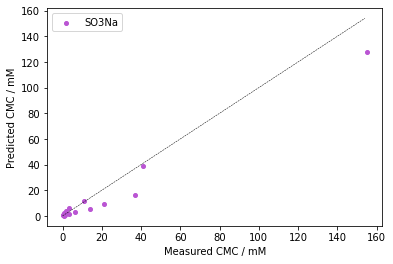

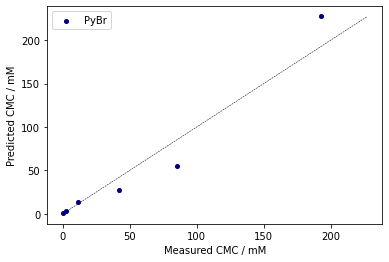

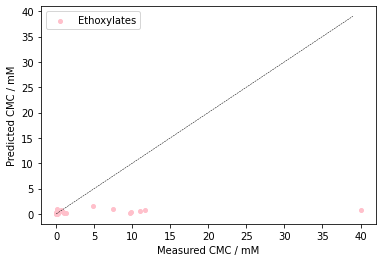

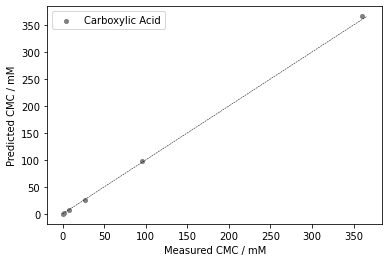

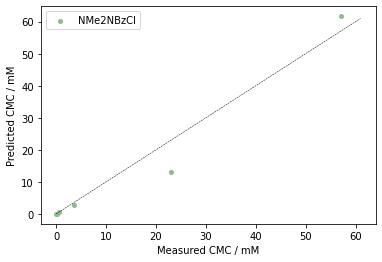

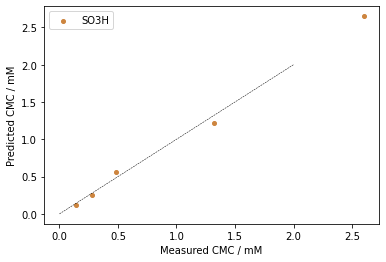

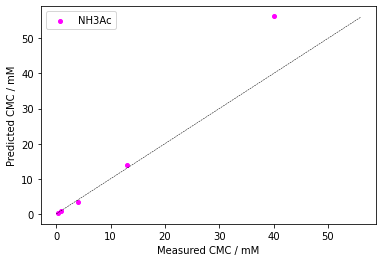

In [45]:
for i in range(len(head_group)):
    pred_meas_indiv_plotter(MW_pred, cmc_vals_select, colours, head_group, i)

*Difference between predicted and measured*

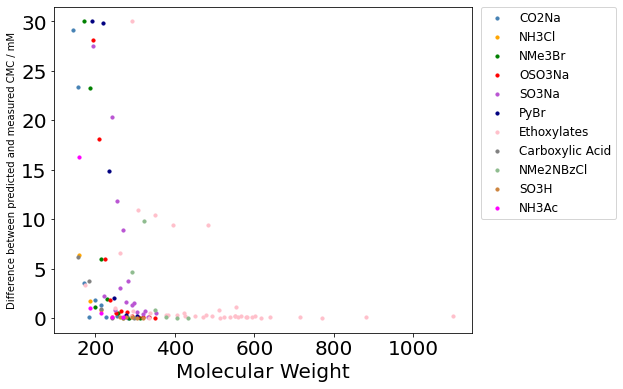

In [46]:
diff_true_cmc_plotter(MW_pred_diff, 30, MW_select, colours, head_group, "Molecular Weight", 
                      "MW_diff_pred_meas.png", False)

***Number of Valence Electrons***

CO2Na equation: y =  -0.11082224748596059 x +  12.579526404953574 

NH3Cl equation: y =  -0.11119245107790579 x +  11.512798854410244 

NMe3Br equation: y =  -0.11587462025236073 x +  14.136877256023759 

OSO3Na equation: y =  -0.10917674914181476 x +  13.516061807968418 

SO3Na equation: y =  -0.10546166697292178 x +  12.815518792683422 

PyBr equation: y =  -0.1259150842962384 x +  15.455841769304321 

Ethoxylates equation: y =  -0.016032756730710016 x +  1.6595428788792606 

Carboxylic Acid equation: y =  -0.10945816679758445 x +  13.120809789127721 

NMe2NBzCl equation: y =  -0.13190232646724767 x +  19.88912006689262 

SO3H equation: y =  -0.12323076692019506 x +  13.746788057614587 

NH3Ac equation: y =  -0.10478164521379577 x +  10.882512723080254 



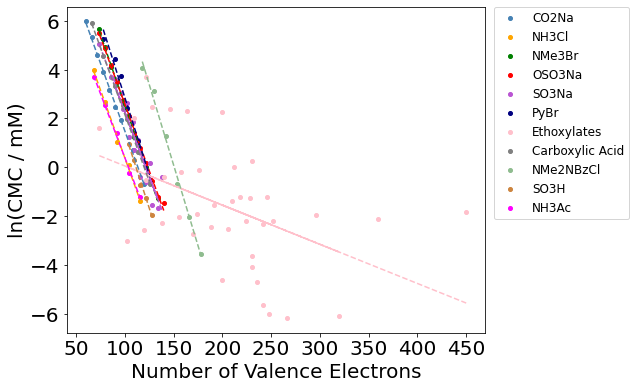

In [47]:
cmc_var_plot(cmc_vals_select, NVE_select, "Number of Valence Electrons", head_group, colours, "compare_NVE.png", 
             False)

*Plot of gradient vs y-intercept for training based on NVE value*

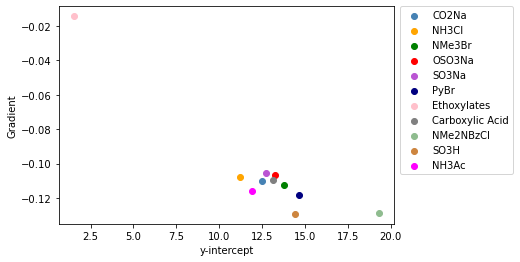

In [48]:
grad_intercept_plotter(head_group, NVE_y_intercept, NVE_gradient, colours, "NVE_grad_inter.png", False)

*Plot of predicted CMC values for different NVE values*

*Only plots test values*

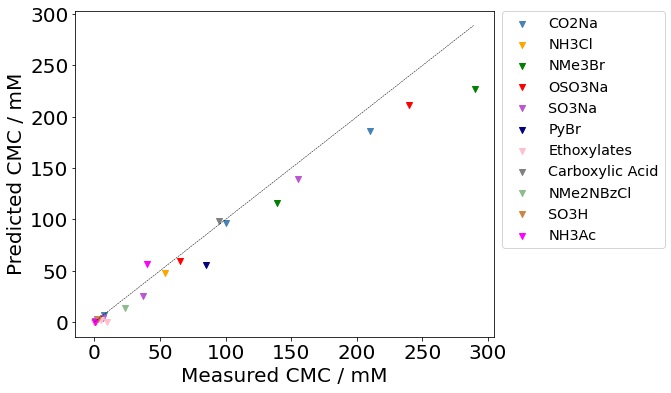

In [49]:
pred_meas_cmc_test_plotter(NVE_test_pred_list, NVE_test_meas_list, 600, 600, colours, head_group, 
                           "NVE_test_pred_meas.png", False)

*Plots all values*

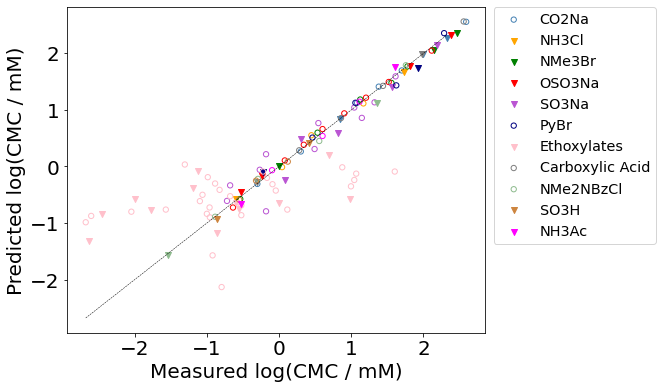

In [50]:
NVE_pred, NVE_pred_diff = pred_true_cmc_data(cmc_vals_select, NVE_select, NVE_gradient, NVE_y_intercept,
                                               startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(NVE_pred, cmc_vals_select, 600, 600, NVE_test_ind_list, True, colours, head_group, 
                      "NVE_pred_meas_log.png", False)

*Individual head group plot*

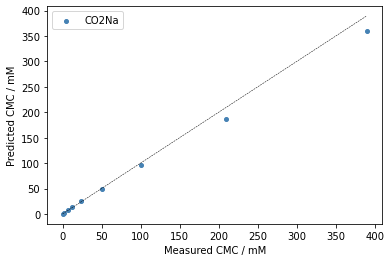

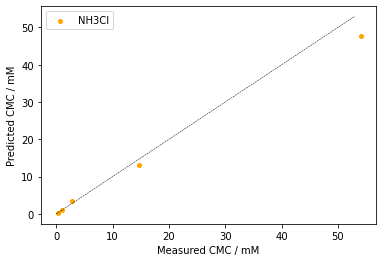

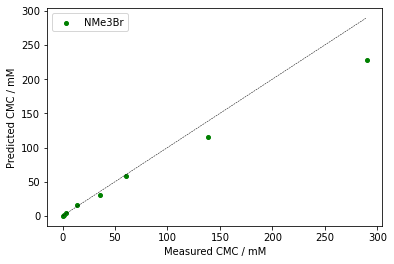

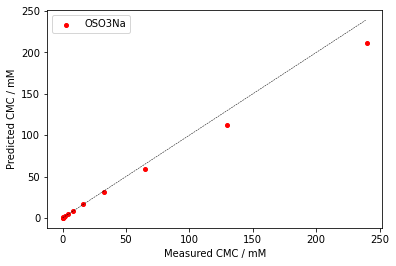

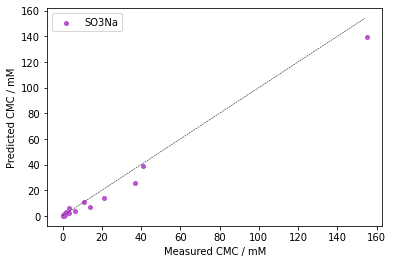

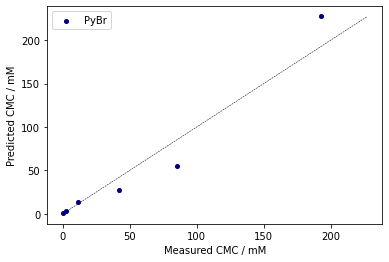

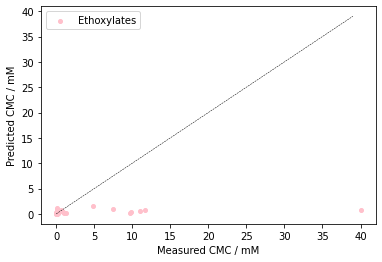

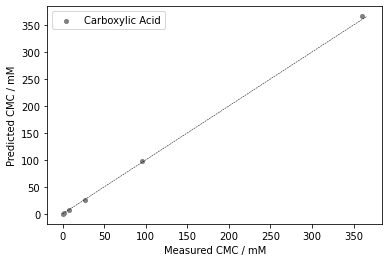

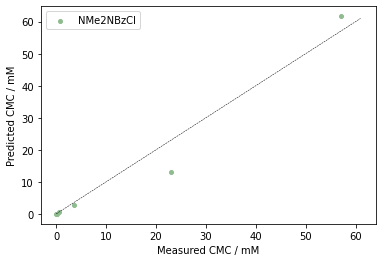

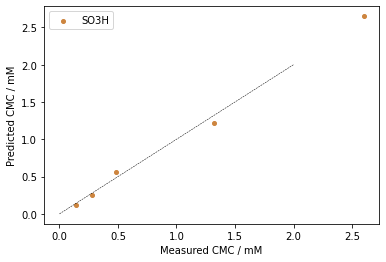

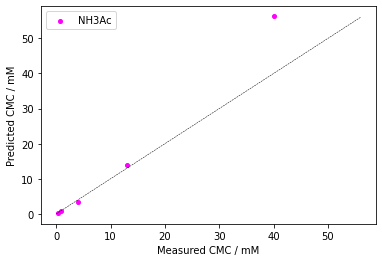

In [51]:
for i in range(len(head_group)):
    pred_meas_indiv_plotter(NVE_pred, cmc_vals_select, colours, head_group, i)

*Difference between predicted and measured*

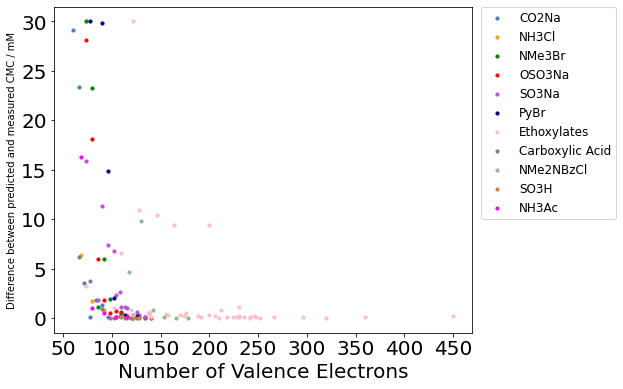

In [52]:
diff_true_cmc_plotter(NVE_pred_diff, 30, NVE_select, colours, head_group, "Number of Valence Electrons", 
                      "NVE_diff_pred_meas.png", False)

***Chi0***

CO2Na equation: y =  -0.9403579524438778 x +  13.283782239600226 

NH3Cl equation: y =  -0.9434992340872869 x +  11.843103007494133 

NMe3Br equation: y =  -0.983228756974323 x +  14.853418814332663 

OSO3Na equation: y =  -0.926395435992957 x +  14.191185297398649 

SO3Na equation: y =  -0.8433701787294129 x +  12.959723614756474 

PyBr equation: y =  -1.06842491951455 x +  16.38563159793206 

Ethoxylates equation: y =  -0.1354142523694478 x +  1.7196676557599337 

Carboxylic Acid equation: y =  -0.928783343985841 x +  13.816397131612277 

NMe2NBzCl equation: y =  -1.119228353991273 x +  21.915929370735814 

SO3H equation: y =  -1.0456477312810644 x +  14.508818306933124 

NH3Ac equation: y =  -0.8891017424946946 x +  11.1937731750765 



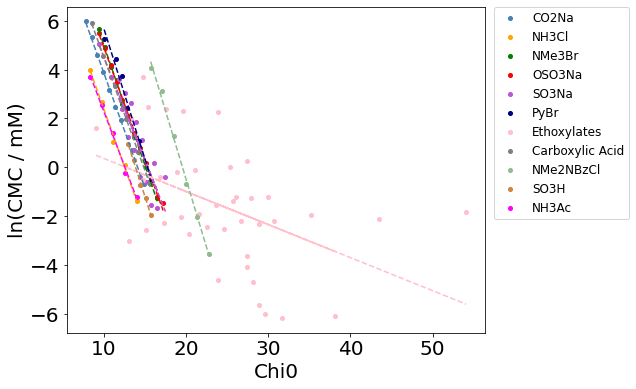

In [53]:
cmc_var_plot(cmc_vals_select, chi0_select, "Chi0", head_group, colours, "compare_chi0.png", False)

***BertzCT***

CO2Na equation: y =  -0.0591545703039475 x +  11.138259343245561 

NH3Cl equation: y =  -0.07126544610264475 x +  7.724319461791119 

NMe3Br equation: y =  -0.06155129161252384 x +  11.132336109858963 

OSO3Na equation: y =  -0.05061626610379569 x +  14.797475092467513 

SO3Na equation: y =  -0.004293164197364704 x +  2.737683865627351 

PyBr equation: y =  -0.05925495808092328 x +  18.52322597090524 

Ethoxylates equation: y =  -0.004246965762500945 x +  0.0371558470529334 

Carboxylic Acid equation: y =  -0.05762997896794967 x +  11.584696010991834 

NMe2NBzCl equation: y =  -0.05566377586993402 x +  28.06972806063069 

SO3H equation: y =  -0.0571202351622845 x +  15.056951172913603 

NH3Ac equation: y =  -0.067223492097384 x +  7.318501199179245 



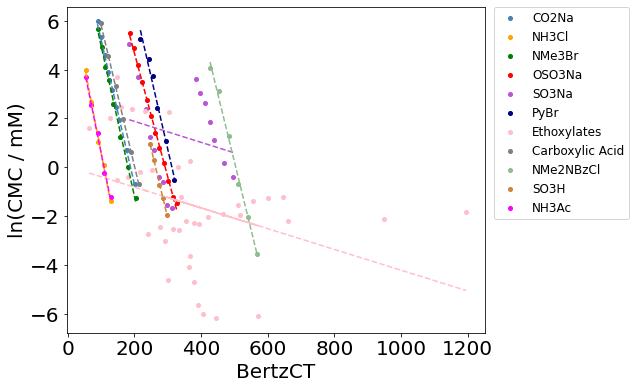

In [54]:
cmc_var_plot(cmc_vals_select, bertzct_select, "BertzCT", head_group, colours, "compare_bertzct.png", False)

***Chi1***

CO2Na equation: y =  -1.3298669698315266 x +  12.27373095583396 

NH3Cl equation: y =  -1.3343094129348694 x +  11.175948301026702 

NMe3Br equation: y =  -1.3904954430283298 x +  13.294227986438038 

OSO3Na equation: y =  -1.3101209897017785 x +  12.72211997912157 

SO3Na equation: y =  -1.1073814751320197 x +  11.037715862355954 

PyBr equation: y =  -1.5109810115548614 x +  16.10836141615848 

Ethoxylates equation: y =  -0.19117380236947967 x +  1.6259769808757114 

Carboxylic Acid equation: y =  -1.3134980015710132 x +  12.818778292429217 

NMe2NBzCl equation: y =  -1.582827917606972 x +  20.063477351573884 

SO3H equation: y =  -1.4787692030423445 x +  12.850644316132318 

NH3Ac equation: y =  -1.257379742565549 x +  10.56508330379373 



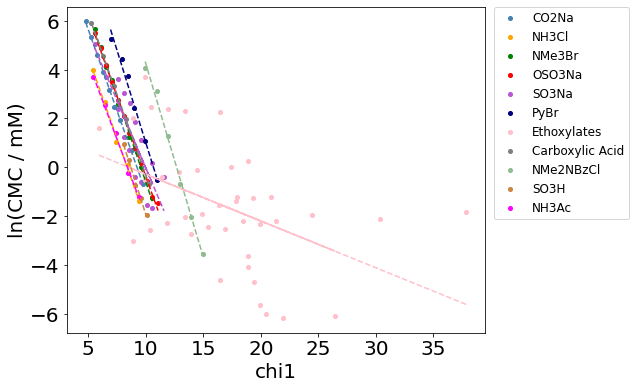

In [55]:
cmc_var_plot(cmc_vals_select, chi1_select, "chi1", head_group, colours, "compare_chi1.png", False)

***PEOE_VSA6***

CO2Na equation: y =  -0.10355894057881469 x +  9.306940384705081 

NH3Cl equation: y =  -0.10390488097119996 x +  8.674050509526976 

NMe3Br equation: y =  -0.10828018006787968 x +  9.092849754130897 

OSO3Na equation: y =  -0.10202128844569473 x +  8.763592940849502 

SO3Na equation: y =  -0.09858384223219868 x +  8.300469462956555 

PyBr equation: y =  -0.1176625905756198 x +  10.22658257846526 

Ethoxylates equation: y =  -0.14631453602421612 x +  6.923577414392687 

Carboxylic Acid equation: y =  -0.10228426194562648 x +  9.888505133790515 

NMe2NBzCl equation: y =  -0.12325742798673683 x +  8.343703418261292 

SO3H equation: y =  -0.11515420376749656 x +  9.121931757451769 

NH3Ac equation: y =  -0.09791424029566419 x +  8.20743254415332 



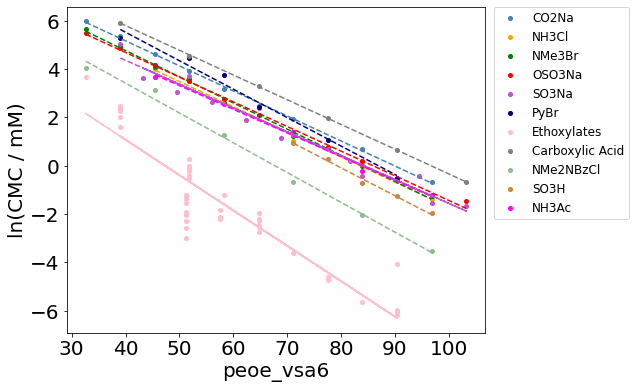

In [56]:
cmc_var_plot(cmc_vals_select, peoe_vsa6_select, "peoe_vsa6", head_group, colours, "compare_peoe_vsa6.png", False)

***Labute_ASA***

CO2Na equation: y =  -0.10446811187988282 x +  12.433289908668655 

NH3Cl equation: y =  -0.10481708937437531 x +  11.431839195806852 

NMe3Br equation: y =  -0.10923080037784018 x +  14.121314552340268 

OSO3Na equation: y =  -0.10291696029241701 x +  13.040496539972413 

SO3Na equation: y =  -0.09267142620787429 x +  11.920330162736247 

PyBr equation: y =  -0.11869558154639243 x +  16.028707065070854 

Ethoxylates equation: y =  -0.016290606106514238 x +  1.7772479598527937 

Carboxylic Acid equation: y =  -0.10318224250618585 x +  12.976373277819139 

NMe2NBzCl equation: y =  -0.12433953751337623 x +  20.248629479722407 

SO3H equation: y =  -0.1161651729477297 x +  13.331094365979652 

NH3Ac equation: y =  -0.09877385528153759 x +  10.806220797304942 



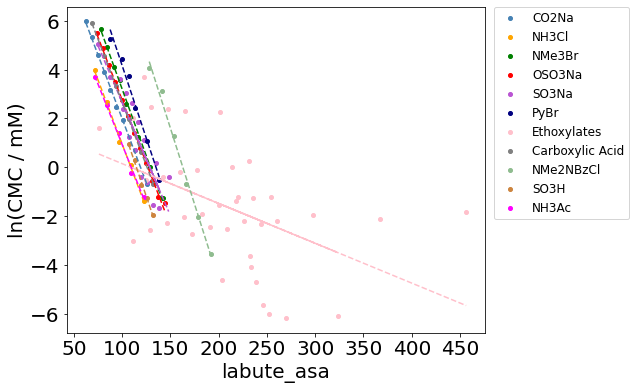

In [57]:
cmc_var_plot(cmc_vals_select, labute_asa_select, "labute_asa", head_group, colours, "compare_labute_asa.png", 
             False)

***MolMR***

CO2Na equation: y =  -0.14401851525141052 x +  11.458054226690829 

NH3Cl equation: y =  -0.14449961153723928 x +  11.229449566146863 

NMe3Br equation: y =  -0.15058430182243102 x +  14.036347176127109 

OSO3Na equation: y =  -0.1418801158438138 x +  11.737622931889385 

SO3Na equation: y =  -0.1304651216854553 x +  11.254851078471642 

PyBr equation: y =  -0.16363233826671633 x +  15.465119722884035 

Ethoxylates equation: y =  -0.027661043881869712 x +  2.1023113277118157 

Carboxylic Acid equation: y =  -0.142245830796081 x +  12.013141504718634 

NMe2NBzCl equation: y =  -0.17141302984697557 x +  19.26359963837505 

SO3H equation: y =  -0.16014394661493822 x +  12.305044135029618 

NH3Ac equation: y =  -0.1361684798100008 x +  10.615499951020816 



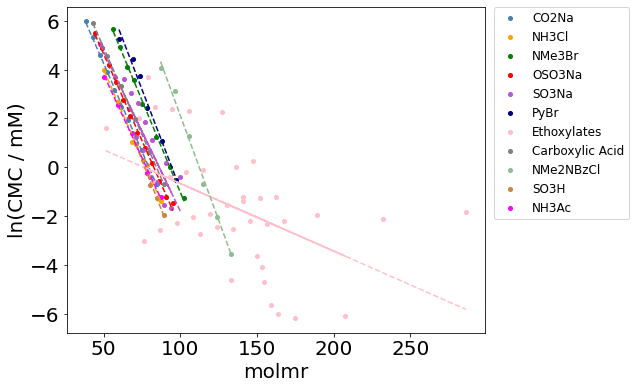

In [58]:
cmc_var_plot(cmc_vals_select, molmr_select, "molmr", head_group, colours, "compare_molmr.png", False)

***Wiener Index***

CO2Na equation: y =  -0.00561451033022097 x +  6.122445609716376 

NH3Cl equation: y =  -0.005665286149333316 x +  4.795570767829568 

NMe3Br equation: y =  -0.004665229034720753 x +  6.172170677069863 

OSO3Na equation: y =  -0.004116417414858258 x +  5.757438480938731 

SO3Na equation: y =  -0.003403854020317081 x +  4.852128346423572 

PyBr equation: y =  -0.00469572040284575 x +  7.079611767815139 

Ethoxylates equation: y =  -5.497662688039143e-05 x +  -1.0960217326399087 

Carboxylic Acid equation: y =  -0.004893049815776492 x +  6.333174653155007 

NMe2NBzCl equation: y =  -0.002541901120883262 x +  6.825699197530704 

SO3H equation: y =  -0.004126319070672287 x +  4.044612220530215 

NH3Ac equation: y =  -0.0053632265948077035 x +  4.56780185219182 



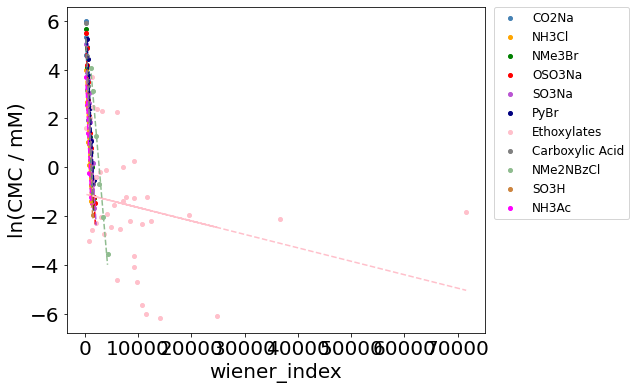

In [59]:
cmc_var_plot(cmc_vals_select, wiener_index_select, "wiener_index", head_group, colours, "compare_wiener_index.png",
            False)

***Zagreb Index 1***

CO2Na equation: y =  -0.16623337122894094 x +  11.914592920037814 

NH3Cl equation: y =  -0.1667886766168587 x +  10.289681892553281 

NMe3Br equation: y =  -0.1738119303785411 x +  13.905128015519038 

OSO3Na equation: y =  -0.16376512371272214 x +  13.29770830968479 

SO3Na equation: y =  -0.09943911908169083 x +  8.98868633332395 

PyBr equation: y =  -0.18887262644435754 x +  16.58907752797046 

Ethoxylates equation: y =  -0.02326756032040884 x +  1.490093603553774 

Carboxylic Acid equation: y =  -0.16418725019637667 x +  12.464060788342215 

NMe2NBzCl equation: y =  -0.19785348970087144 x +  23.31858055504105 

SO3H equation: y =  -0.18484615038029265 x +  13.5003265237742 

NH3Ac equation: y =  -0.1571724678206937 x +  9.729914625728503 



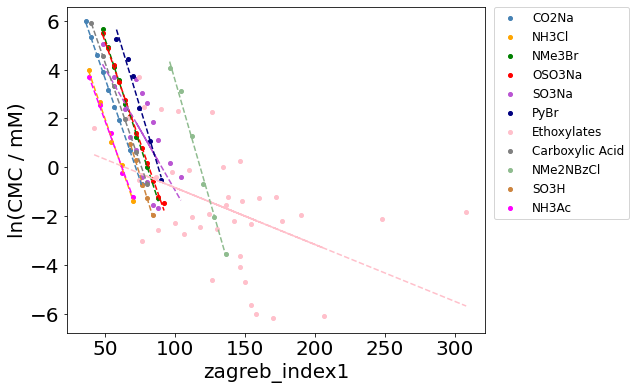

In [60]:
cmc_var_plot(cmc_vals_select, zagreb_index1_select, "zagreb_index1", head_group, colours, 
             "compare_zagreb_index1.png", False)

***Zagreb Index 2***

CO2Na equation: y =  -0.16623337122894094 x +  11.582126177579932 

NH3Cl equation: y =  -0.1667886766168587 x +  9.956104539319565 

NMe3Br equation: y =  -0.1738119303785411 x +  13.557504154761956 

OSO3Na equation: y =  -0.16376512371272214 x +  12.970178062259345 

SO3Na equation: y =  -0.0812046918080568 x +  7.559775653483706 

PyBr equation: y =  -0.18887262644435754 x +  16.966822780859175 

Ethoxylates equation: y =  -0.0227428170563305 x +  1.4159116089993122 

Carboxylic Acid equation: y =  -0.16418725019637667 x +  12.135686287949461 

NMe2NBzCl equation: y =  -0.19785348970087144 x +  24.70355498294715 

SO3H equation: y =  -0.18484615038029265 x +  13.130634223013615 

NH3Ac equation: y =  -0.1571724678206937 x +  9.415569690087116 



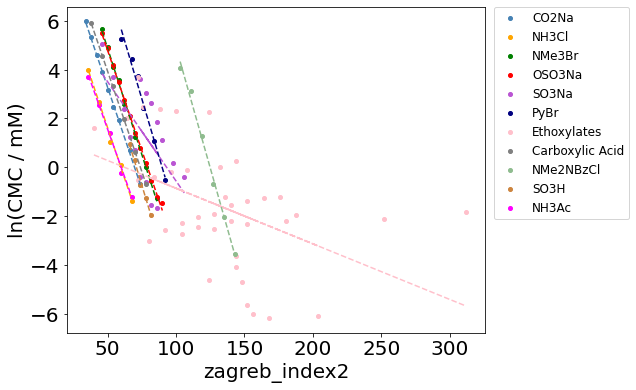

In [61]:
cmc_var_plot(cmc_vals_select, zagreb_index2_select, "zagreb_index2", head_group, colours,
             "compare_zagreb_index2.png", False)

***Walk Count***

CO2Na equation: y =  -0.6649334849157638 x +  11.914592920037814 

NH3Cl equation: y =  -0.6671547064674348 x +  10.623259245786999 

NMe3Br equation: y =  -0.6952477215141644 x +  13.209880294004874 

OSO3Na equation: y =  -0.6550604948508886 x +  12.642647814833902 

SO3Na equation: y =  -0.47795664046116487 x +  9.850489332506655 

PyBr equation: y =  -0.7554905057774302 x +  16.211332275081745 

Ethoxylates equation: y =  -0.09471342393892043 x +  1.5493418594061525 

Carboxylic Acid equation: y =  -0.6567490007855067 x +  12.464060788342215 

NMe2NBzCl equation: y =  -0.7914139588034858 x +  20.944338678630594 

SO3H equation: y =  -0.7393846015211706 x +  12.76094192225303 

NH3Ac equation: y =  -0.6286898712827748 x +  10.044259561369891 



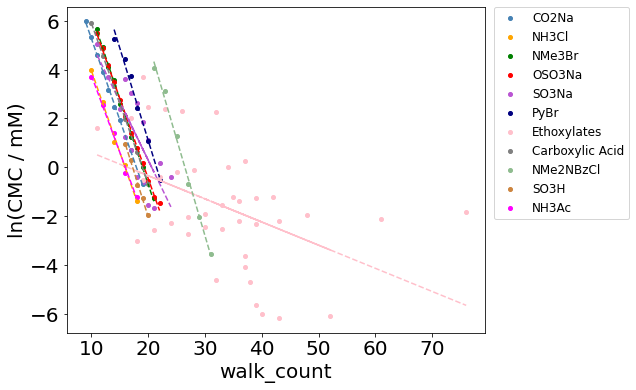

In [62]:
cmc_var_plot(cmc_vals_select, walk_count_select, "walk_count", head_group, colours, "compare_walk_count.png", 
             False)

***Total IC***

CO2Na equation: y =  -0.22255945668231883 x +  12.973826763294992 

NH3Cl equation: y =  -0.2333852609312463 x +  12.423319917170797 

NMe3Br equation: y =  -0.24429018560843055 x +  15.138587814797196 

OSO3Na equation: y =  -0.19816864701160603 x +  13.87527956436776 

SO3Na equation: y =  -0.2036642334044545 x +  13.663956525176722 

PyBr equation: y =  -0.2645228746261742 x +  16.19874337098479 

Ethoxylates equation: y =  -0.029357511942702065 x +  1.6104525220594388 

Carboxylic Acid equation: y =  -0.2211470977035105 x +  13.57135016606349 

NMe2NBzCl equation: y =  -0.2601460367997432 x +  21.994367497564287 

SO3H equation: y =  -0.23718741587613604 x +  14.924151659097847 

NH3Ac equation: y =  -0.21990333213473756 x +  11.739292250954021 



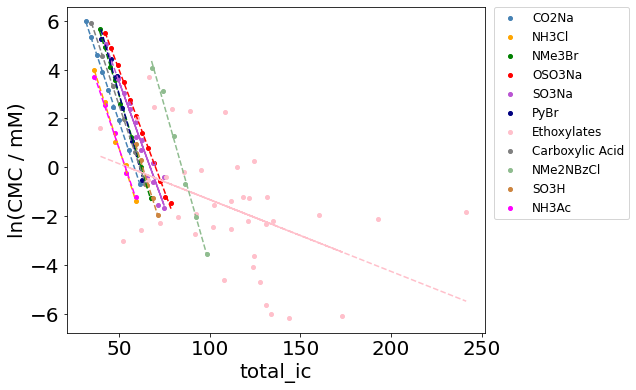

In [63]:
cmc_var_plot(cmc_vals_select, total_ic_select, "total_ic", head_group, colours, "compare_total_ic.png", False)